# Author: Ashcroft Johnny Johnson

# The University of Huddersfield

# MSc Data Analytics

# Individual _Project_2023_Conducting the Diagnosis and Prediction of Stroke Diseases

# Year 2023

# Contact Number: 07404356611

# Email: ashcroft.j.johnson@outlook.com


##  The aim of this research project is to design an AI-powered framework and interface.
## particularly utilising machine learning techniques, for the diagnosis and prediction of  stroke diseases

1. With the goal of forecasting the occurrence of a stroke in patients, this study entails analysing a healthcare dataset.  age, hypertension, heart disease, marital status, kind of job, type of habitation, average blood glucose level, BMI, 
3. smoking status, and gender are some of the aspects of the dataset that relate to the health and lifestyle of the 
4. patients. The properties of each entry, which each represents a distinct patient, capture different stroke risk factors. 5. The creation of a prediction model that can accurately anticipate the occurrence of a stroke based on the features 
6. offered is the major goal of our research. 
7. The aim of this research project is to design an AI-powered framework and interface, 
8. particularly utilising machine learning techniques, for the diagnosis and prediction of stroke diseases. 
9. The research aims to develop an advanced system that enhances the accuracy and efficiency of stroke diagnosis, enables 10. early detection, and provides predictive insights for stroke occurrence. The overall goal is to contribute to improved 11.stroke management and patient outcomes.
12. These algorithms were used for the prediction:
13.	Logistic Regression (LR)
14.	Support Vector Machines (SVM)
15.	Decision Tree Classifier (DT)
16.	Neural Networks (MLP)
17.	K-Nearest Neighbors (KNN)
18.	Extreme Gradient Boosting (XGBoost)
19.	Random Forest Classifier (RF)

# Exploratory Data Analysis

# Feature Engineering - Phase 

1. Importing relevant libraries for our investigation

2. Important libraries such as numpy, pandas, and seaborn, just to name a few, have been imported.

In [1]:
import pandas as ashcroft
import numpy as johnny
import seaborn as johnson
import matplotlib.pyplot as ash
import missingno as msno
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')


 # Step 1: Importing the data from an CSV file 
 
1. The initial step involves importing the data from an excel file and storing it in a pandas DataFrame

In [2]:
# We load the data into a data structure that allows us to manipulate and analyze it.

# We can use pandas library in Python to load the data into a data frame.

Stroke_Johnson = ashcroft.read_csv("C:/Users/ashcr/Documents/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv")

positive_case = Stroke_Johnson.loc[Stroke_Johnson['stroke'] == '1']
negative_case = Stroke_Johnson.loc[Stroke_Johnson['stroke'] == '0']

display(Stroke_Johnson)

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
# Creates a new Pandas DataFrame, that is a copy of the original DataFrame data.

brother = Stroke_Johnson.copy()

# Basic Analysis

1. After loading the data, we need to understand the structure of the data frame and the different variables

2. Target variable : Stroke

3. Rows and columns : 5110 and 12

In [4]:
# The code below prints the first rows.
brother.head(50)

id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
13   8213    Male  78.0             0              1          Yes   
14   5317  Female  79.0             0              1          Yes   
15  58202  Female  50.0             1              0          Yes   
16  56112    Male  64.0             0              1          Yes   
17  34120    Male  75.0             1              0          Yes   
18  27458  Female  60.0             0              0           No   
19  25226    Male  57.0             0              1           No   
20  70630  Female  71.0             0              0          Yes   
21  13861  Female  52.0             1              0          Yes   
22  68794  Female  79.0             0              0          Yes   
23  64778    Male  82.0             0              1          Yes   
24   4219    Male  71.0             0              0          Yes   
25  70822    Male  80.0             0              0          Yes   
26  38047  Female  65.0             0              0          Yes   
27  61843    Male  58.0             0              0          Yes   
28  54827    Male  69.0             0              1          Yes   
29  69160    Male  59.0             0              0          Yes   
30  43717    Male  57.0             1              0          Yes   
31  33879    Male  42.0             0              0          Yes   
32  39373  Female  82.0             1              0          Yes   
33  54401    Male  80.0             0              1          Yes   
34  14248    Male  48.0             0              0           No   
35    712  Female  82.0             1              1           No   
36  47269    Male  74.0             0              0          Yes   
37  24977  Female  72.0             1              0          Yes   
38  47306    Male  58.0             0              0           No   
39  62602  Female  49.0             0              0          Yes   
40   4651    Male  78.0             0              0          Yes   
41   1261    Male  54.0             0              0          Yes   
42  61960    Male  82.0             0              1          Yes   
43   1845  Female  63.0             0              0          Yes   
44   7937    Male  60.0             1              0          Yes   
45  19824    Male  76.0             1              0          Yes   
46  37937  Female  75.0             0              1           No   
47  47472  Female  58.0             0              0          Yes   
48  35626    Male  81.0             0              0          Yes   
49  36338  Female  39.0             1              0          Yes   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
1   Self-employed          Rural             202.21   NaN     never smoked   
2         Private          Rural             105.92  32.5     never smoked   
3         Private          Urban             171.23  34.4           smokes   
4   Self-employed          Rural             174.12  24.0     never smoked   
5         Private  

In [5]:
# In pandas, investigation.T is an attribute used to transpose a pandas DataFrame, 
# i.e., it swaps the rows and columns of the DataFrame
# In the resulting DataFrame, the column names of the original DataFrame become the row names, 
# and the row names of the original DataFrame become the column names.

brother.T

0              1             2        3     \
id                            9046          51676         31112    60182   
gender                        Male         Female          Male   Female   
age                           67.0           61.0          80.0     49.0   
hypertension                     0              0             0        0   
heart_disease                    1              0             1        0   
ever_married                   Yes            Yes           Yes      Yes   
work_type                  Private  Self-employed       Private  Private   
Residence_type               Urban          Rural         Rural    Urban   
avg_glucose_level           228.69         202.21        105.92   171.23   
bmi                           36.6            NaN          32.5     34.4   
smoking_status     formerly smoked   never smoked  never smoked   smokes   
stroke                           1              1             1        1   

                            4                5             6             7     \
id                          1665            56669         53882         10434   
gender                    Female             Male          Male        Female   
age                         79.0             81.0          74.0          69.0   
hypertension                   1                0             1             0   
heart_disease                  0                0             1             0   
ever_married                 Yes              Yes           Yes            No   
work_type          Self-employed          Private       Private       Private   
Residence_type             Rural            Urban         Rural         Urban   
avg_glucose_level         174.12           186.21         70.09         94.39   
bmi                         24.0             29.0          27.4          22.8   
smoking_status      never smoked  formerly smoked  never smoked  never smoked   
stroke                         1                1             1             1   

                      8        9     ...           5100     5101  \
id                   27419    60491  ...          68398    36901   
gender              Female   Female  ...           Male   Female   
age                   59.0     78.0  ...           82.0     45.0   
hypertension             0        0  ...              1        0   
heart_disease            0        0  ...              0        0   
ever_married           Yes      Yes  ...            Yes      Yes   
work_type          Private  Private  ...  Self-employed  Private   
Residence_type       Rural    Urban  ...          Rural    Urban   
avg_glucose_level    76.15    58.57  ...          71.97    97.95   
bmi                    NaN     24.2  ...           28.3     24.5   
smoking_status     Unknown  Unknown  ...   never smoked  Unknown   
stroke                   1        1  ...              0        0   

                           5102     5103      5104          5105  \
id                        45010    22127     14180         18234   
gender                   Female   Female    Female        Female   
age                        57.0     18.0      13.0          80.0   
hypertension                  0        0         0             1   
heart_disease                 0        0         0             0   
ever_married                Yes       No        No           Yes   
work_type               Private  Private  children       Private   
Residence_type            Rural    Urban     Rural         Urban   
avg_glucose_level         77.93    82.85    103.08         83.75   
bmi                        21.7     46.9      18.6           NaN   
smoking_status     never smoked  Unknown   Unknown  never smoked   
stroke                        0        0         0             0   

                            5106           5107             5108      5109  
id                         44873          19723            37544     44679  
gender                    Female         Female             Mal

In [6]:
# investigation.tail() is a Pandas DataFrame 
# method that returns the last n rows of a DataFrame,
# where n is an integer argument (by default, n=5). 
# This can be useful for quickly inspecting the end of a DataFrame.

brother.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [7]:
# "investigation.index" attribute returns the row labels or index values of the DataFrame or Series.
# The index is usually a sequence of integers or a sequence of labels that uniquely identify each row in the data.
brother.index

RangeIndex(start=0, stop=5110, step=1)

In [8]:
brother.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# Get all columns in ascending order

cols_all = sorted(brother.columns)

print(cols_all)

['Residence_type', 'age', 'avg_glucose_level', 'bmi', 'ever_married', 'gender', 'heart_disease', 'hypertension', 'id', 'smoking_status', 'stroke', 'work_type']


In [10]:
# This code will print out all the columns & information it contains.
print(brother)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [11]:
print("The total length of the Stroke dataset is: " , len(list(brother[0:1:-1])))

The total length of the Stroke dataset is:  12


# To verify the size of Healthcare-Data- Brain_Stroke dataset: 

 1.  We can utilize the built-in function in Jupyter Notebook.

In [12]:
print("The total size of Stroke Dataset is: ",  brother.shape)

The total size of Stroke Dataset is:  (5110, 12)


# Getting data information 

In [13]:
# In Pandas, df.keys() is used to get the column labels of the DataFrame as a list. 
# It returns a list of column names present in the DataFrame. 
# This function is useful to get a quick overview of the column names in a DataFrame

brother.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
brother.info()# In Python, .info() is a method used to retrieve a concise summary of a pandas DataFrame

# data type, and memory usage for each column

# When applied to a DataFrame, it provides information about the number of non-null values,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
# The memory_usage parameter set to 'deep' 
# provides an accurate memory usage by recursively iterating through the object, 
# accounting for its constituent objects

brother.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.8 MB


In [16]:
# We then use the dtypes attribute to print the data type of each column
print(brother.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [17]:
print(dict(brother.dtypes))

{'id': dtype('int64'), 'gender': dtype('O'), 'age': dtype('float64'), 'hypertension': dtype('int64'), 'heart_disease': dtype('int64'), 'ever_married': dtype('O'), 'work_type': dtype('O'), 'Residence_type': dtype('O'), 'avg_glucose_level': dtype('float64'), 'bmi': dtype('float64'), 'smoking_status': dtype('O'), 'stroke': dtype('int64')}


In [18]:
# The first line of code for col in df.select_dtypes('Object'): 
# is a loop that iterates through all columns in the DataFrame that have data type object
# The columns with values less than or equal to 50 would be printed out.

for col in brother.select_dtypes('object'):
  print(f'{col :-<50} ,{brother[col].unique()}')

gender-------------------------------------------- ,['Male' 'Female' 'Other']
ever_married-------------------------------------- ,['Yes' 'No']
work_type----------------------------------------- ,['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ,['Urban' 'Rural']
smoking_status------------------------------------ ,['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [19]:
# This code is useful for exploring categorical variables in a dataset
# by examining the frequency of unique values in each object column.

for col in brother.select_dtypes('object'):
    print(brother[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [20]:
# Investigation.dtypes returns a pandas Series with the data type of each column in a dataframe. 
# investigation.dtypes.value_counts() applies the value_counts()
# method to this Series to count the number of columns with each data type

brother.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

# Confronted with the absence of certain values:

1. The dataset we are working with contains some NaN values 

2. Which need to be addressed using statistical techniques in Pandas.

3. There are several ways to handle missing values in Pandas. 

4. One approach is to drop the entire row or instance that contains the missing value.

5. Missing values are identified in Python as np.nan (NaN values in numpy). 

6. There are various common strategies for replacing missing values, 

7. Including using the df.dropna function to remove rows or columns with missing data, or the 

8. df.fillna() function to replace missing values with other values, such as the mean, mode, or median.

9. To determine which columns have missing information, the for loop provided below can be used.

In [21]:
# Check for missing values
brother.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
 # This creates a list of all the column names in the DataFrame df using a for loop 
 # that iterates over the df.columns object
 # The variable features is a temporary variable used to represent each column name.
 # if df[features].isnull().sum()>0: This condition checks if there are any missing values 
 # in the current column (df[features]). If the sum of the missing values is greater than 0,
 # then the column name (features) is included in the list comprehension.
    
[features for features in brother.columns if brother[features].isnull().sum()>0]

['bmi']

In [23]:

null_cols = brother.columns[brother.isnull().any()]

print("Columns with missing values:", null_cols)

#This code reads the csv file into a pandas DataFrame object and then 
# checks for missing values in all columns using the isnull() method. 
# The any() method returns a boolean mask indicating if any value in each column is missing. 
# The columns method is used to get a list of column names, and null_cols
# is assigned the subset of column names where at least one value is missing. 
# Finally, the code prints the column names with missing values.
# check for missing values in all columns


Columns with missing values: Index(['bmi'], dtype='object')


In [24]:
# The code "brother.isna().sum()" is used to count the number of missing values in each column of the dataframe "brother".
brother.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
# (brother.isna().sum()/brother.shape[0]) divides 
# the number of missing values in each column by the total number of rows,
# resulting in the percentage of missing values in each column.

(brother.isna().sum()/brother.shape[0]).sort_values(ascending=True)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  0.039335
dtype: float64

# In this code, pd.option_context sets 

1. the options for printing the DataFrame without any row or column limits,

2. so that all missing values can be displayed

In [26]:
# Get the count of missing values in each column
missing_values_count = brother.isnull().sum()

# Print all missing values without any break
with ashcroft.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values_count)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# Further Investigation on  "N/A", "NAN values", "Missing Values", "Special Characters"

In [27]:
# Replace 'N/A' and 'NAN' with actual NaN values
brother = brother.replace(['N/A', 'NAN'], [johnny.nan, johnny.nan])

In [28]:
special_values = [johnny.nan, "Missing Values", "Special Characters"]

found_special_values = False

for column in brother.columns:
    special_value_count = brother[column].isin(special_values).sum()
    if special_value_count > 0:
        print(f"Column '{column}' has {special_value_count} special values:")
        print(brother[brother[column].isin(special_values)][column])
        print("---")
        found_special_values = True

if not found_special_values:
    print("No special values found in the dataset.")

Column 'bmi' has 201 special values:
1      NaN
8      NaN
13     NaN
19     NaN
27     NaN
        ..
5039   NaN
5048   NaN
5093   NaN
5099   NaN
5105   NaN
Name: bmi, Length: 201, dtype: float64
---


In [29]:
# Print all the information on the "smoking_status" column
print(brother["smoking_status"])

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object


# Function to calculate the percentage of "Unknown" values in the "smoking_status" column

In [30]:
# Function to calculate the percentage of "Unknown" values in the "smoking_status" column
def calculate_unknown_percentage(brother, column_name):
    
    total_count = len(brother)
    unknown_count = brother[column_name].value_counts().get('Unknown', 0)
    unknown_percentage = (unknown_count / total_count) * 100
    return unknown_percentage

# Call the function to get the percentage of "Unknown" values in the "smoking_status" column
percentage_unknown = calculate_unknown_percentage(brother, 'smoking_status')

print(f'Percentage of "Unknown" values in the "smoking_status" column: {percentage_unknown:.2f}%')

Percentage of "Unknown" values in the "smoking_status" column: 30.22%


In [31]:
# In the code above, inve.isna().sum() 
# calculates the number of missing values in each column, 
# and len(investigation.) gives the total number of rows in the dataframe. 
# The result is then multiplied by 100 to convert it to a percentage.
# Calculate the percentage of missing values in each column

#  Calculate the percentage of missing values in each column
percent_missing = brother.isna().sum() / len(brother) * 100

# Print the result
print(percent_missing)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


# Visualisation Missing Data 
1. The bar plot below helps you to visualise the Missing Values or NAN Values in the dataset

The size in row is: 5110


<AxesSubplot:>

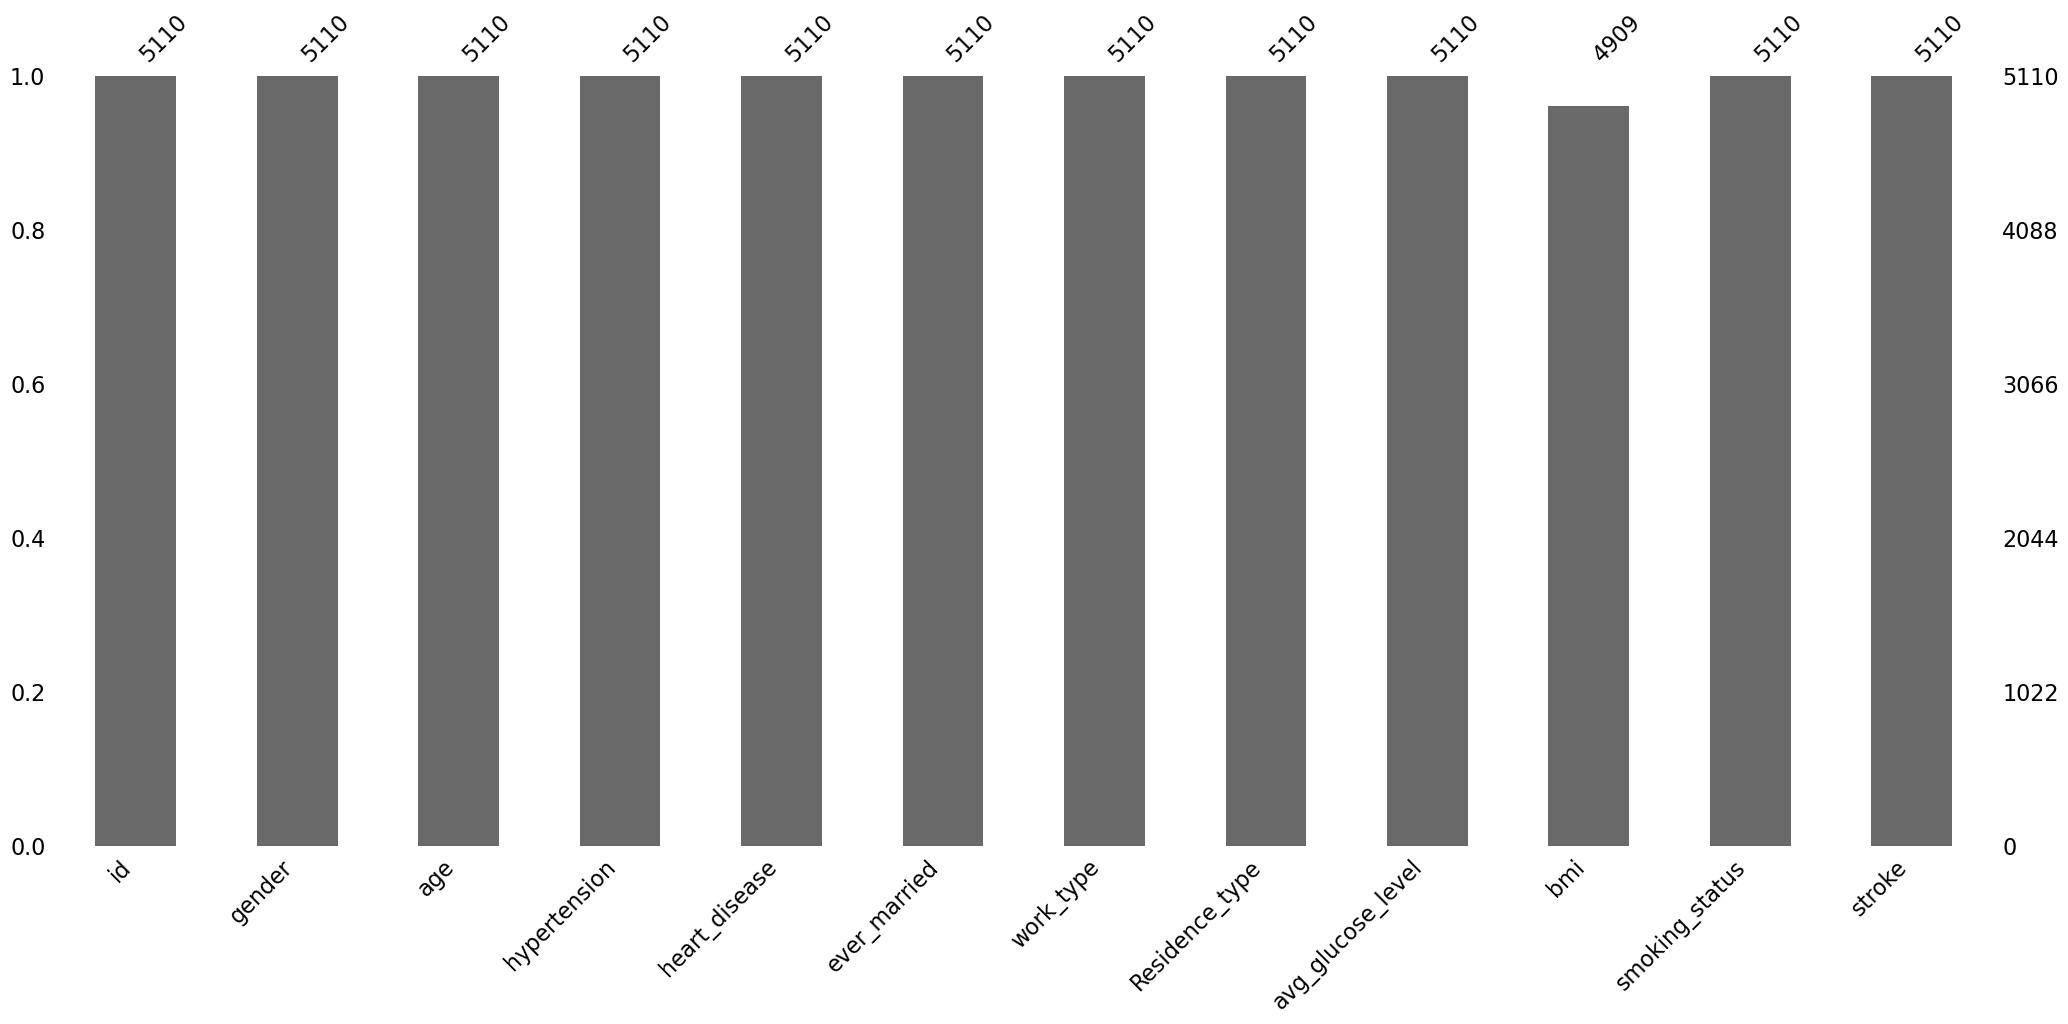

In [32]:
# This help us understand the row size:
print ('The size in row is:',brother.shape[0])
msno.bar(brother)

In [33]:
Looking_missing = brother.isna().sum()/brother.shape[0]
results_stroke = brother.columns[(Looking_missing < 0.90) & (Looking_missing > 0.87)]

In [34]:
for col in results_stroke:
    ash.figure()
    johnson.distplot(positive_case[col],label='0', color='red')
    johnson.distplot(negative_case[col],label='0', color='green')
    
    ash.legend()

# Descriptive Analysis

1. Descriptive analysis is an essential step in data analysis because it provides a summary of the key features 

2. and characteristics of the data set. It helps to explore the underlying patterns and relationships in the data, 

3. detect outliers, missing values, and understand the distribution of the variables. 

4. By performing descriptive analysis, we can gain insights into the nature of the data, 


5. which can guide the selection of appropriate statistical techniques and models for further analysis

In [35]:
brother.describe().T

# The T attribute transposes the resulting DataFrame, 
# which means it switches the rows and columns. So df.describe().T 
# returns a transposed DataFrame, where the statistics for each column are shown as rows

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

In [36]:
# ".describe()" is a built-in Pandas method that generates descriptive statistics of the dataset, 
# including the count, mean, standard deviation, minimum, maximum, and quartiles for the numeric variables. 
# "include="all"" specifies that all columns in the dataset should be included in the summary, 
# including both numeric and categorical variables.

brother.describe(include="all").T

count unique           top  freq          mean  \
id                 5110.0    NaN           NaN   NaN  36517.829354   
gender               5110      3        Female  2994           NaN   
age                5110.0    NaN           NaN   NaN     43.226614   
hypertension       5110.0    NaN           NaN   NaN      0.097456   
heart_disease      5110.0    NaN           NaN   NaN      0.054012   
ever_married         5110      2           Yes  3353           NaN   
work_type            5110      5       Private  2925           NaN   
Residence_type       5110      2         Urban  2596           NaN   
avg_glucose_level  5110.0    NaN           NaN   NaN    106.147677   
bmi                4909.0    NaN           NaN   NaN     28.893237   
smoking_status       5110      4  never smoked  1892           NaN   
stroke             5110.0    NaN           NaN   NaN      0.048728   

                            std    min       25%      50%      75%      max  
id                 21161.721625   67.0  17741.25  36932.0  54682.0  72940.0  
gender                      NaN    NaN       NaN      NaN      NaN      NaN  
age                   22.612647   0.08      25.0     45.0     61.0     82.0  
hypertension           0.296607    0.0       0.0      0.0      0.0      1.0  
heart_disease          0.226063    0.0       0.0      0.0      0.0      1.0  
ever_married                NaN    NaN       NaN      NaN      NaN      NaN  
work_type                   NaN    NaN       NaN      NaN      NaN      NaN  
Residence_type              NaN    NaN       NaN      NaN      NaN      NaN  
avg_glucose_level      45.28356  55.12    77.245   91.885   114.09   271.74  
bmi                    7.854067   10.3      23.5     28.1     33.1     97.6  
smoking_status              NaN    NaN       NaN      NaN      NaN      NaN  
stroke                  0.21532    0.0       0.0      0.0      0.0      1.0

In [37]:
# The code filters this DataFrame based on the condition that only rows
# where the value in column "SAR-Cov-2 exam result" is equal to "NaN" should be included in the filtered DataFrame

brother[brother["stroke"].isin(["NaN" ])]

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

# Create the countplot for stroke presence

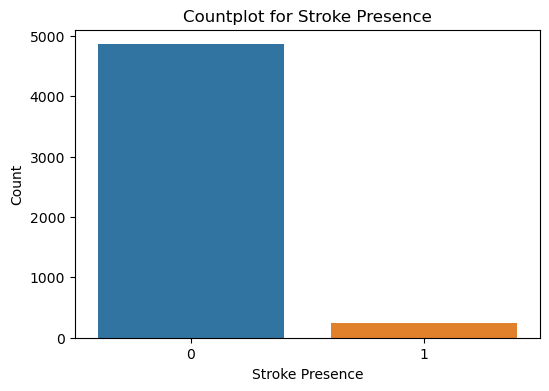

In [38]:
# Create the countplot for stroke presence
ash.figure(figsize=(6, 4))
johnson.countplot(x='stroke', data=brother)
ash.xlabel('Stroke Presence')
ash.ylabel('Count')
ash.title('Countplot for Stroke Presence')
ash.show()

# Correlation matrix on Stroke

1. Before applying One-Hot Encoder(Get_dummies)

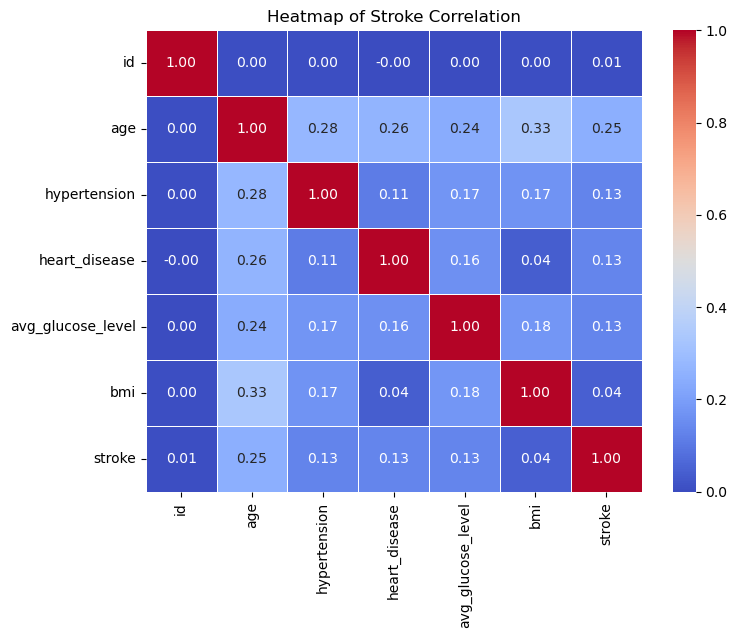

In [39]:
# "corr()" is a pandas function used to calculate the correlation between columns in the DataFrame.
#  It then calculates the correlation between the selected columns and creates a heatmap of the correlations
# using Seaborn's heatmap function. The resulting heatmap will display the correlation 
# between the selected columns as a color-coded matrix, with the color indicating the strength of the correlation.

# Compute the correlation matrix
correlation_matrix = brother.corr()

# Plot the heatmap
ash.figure(figsize=(8, 6))
johnson.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
ash.title('Heatmap of Stroke Correlation')
ash.show()

# Clustermap Before Applying One - Hot- Encoding (Get_Dummies)

<Figure size 1000x800 with 0 Axes>

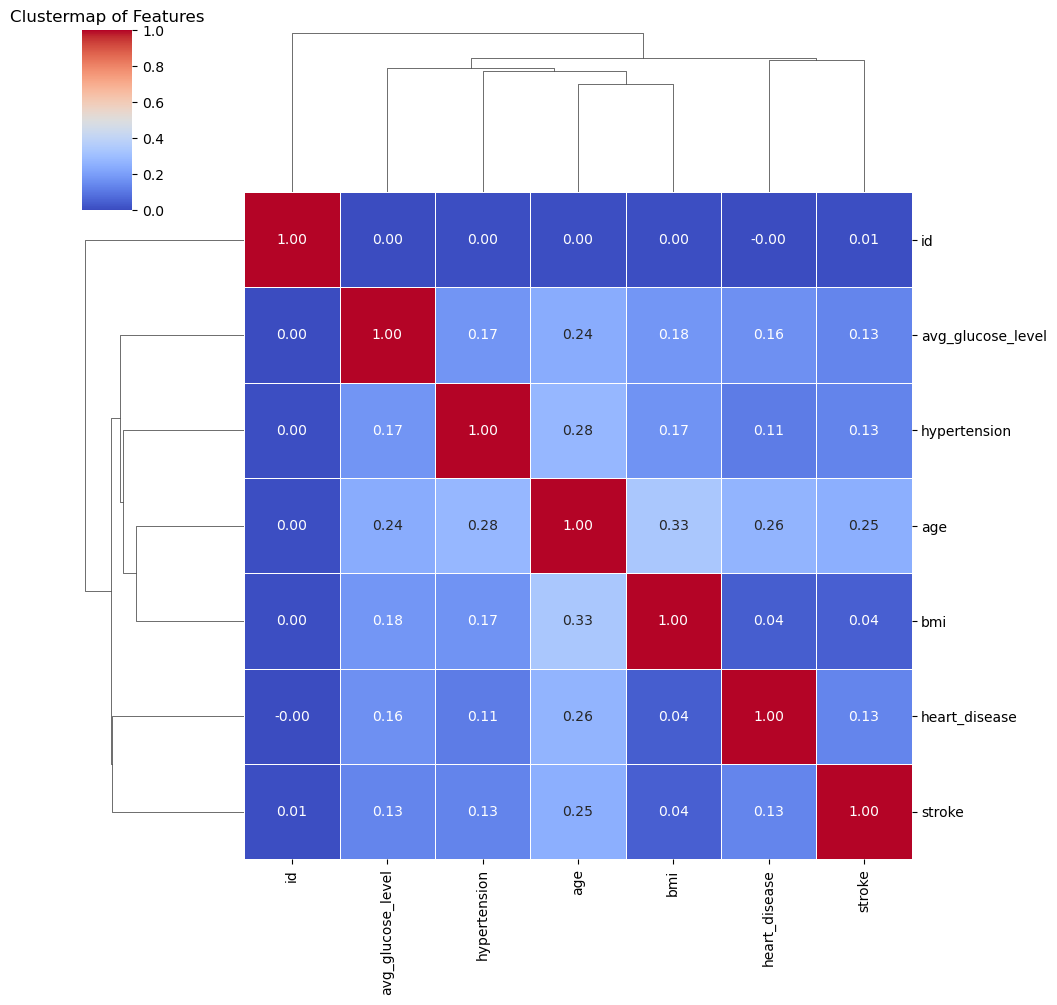

In [40]:
# The resulting plot is a heatmap that shows the pairwise correlation
# between the columns in results_blood_per_columns.
# The colors in the heatmap represent the strength of the correlation between each pair of columns,
# with warmer colors indicating stronger positive correlations 
# and cooler colors indicating stronger negative correlations. 
# Additionally, the rows and columns in the heatmap are clustered together based on their similarity 
# in correlation patterns, which can reveal underlying patterns and relationships in the data.

# Compute the correlation matrix
correlation_matrix = brother.corr()

# Plot the clustermap
ash.figure(figsize=(10, 8))
johnson.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
ash.title('Clustermap of Features')
ash.show()

# Now we can start exploring the data and identifying any patterns or relationships 

1. That can help us predict the test result for Stroke. 

2. We can start by looking at the distribution of the Stroke

In [41]:
# "investigation['SARS-Cov-2 exam result']" 
# refers to a specific column of a Pandas DataFrame named "investigation".
# the square brackets notation "[]" is used to index or select specific columns of a DataFrame.
# In this case, "SARS-Cov-2 exam result" is the name of the column being selected.

brother["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [42]:
# This will output the number of positive and negative (0,1) occurences of Stroke

brother['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

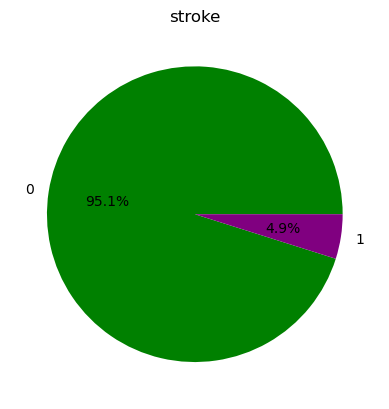

In [43]:
# We apply count to visualise the values found within stroke column
brother_vis = brother['stroke'].value_counts()

colors = ['green', 'purple'] # colors for the two parts

# add title
ash.title('stroke')

# plot a pie chart
ash.pie(brother_vis, labels=brother_vis.index, colors=colors, autopct='%1.1f%%')

ash.show()

# In the above code, the autopct parameter takes a format string 
# that specifies how to format the percentage values. %1.1f%% specifies to display the percentage with one decimal place.
# The double percentage sign %% is used to escape the % character, since it has a special meaning in format strings.

In [44]:
# If the below diagram works, provide diagrams for all the others:

<AxesSubplot:xlabel='age', ylabel='Density'>

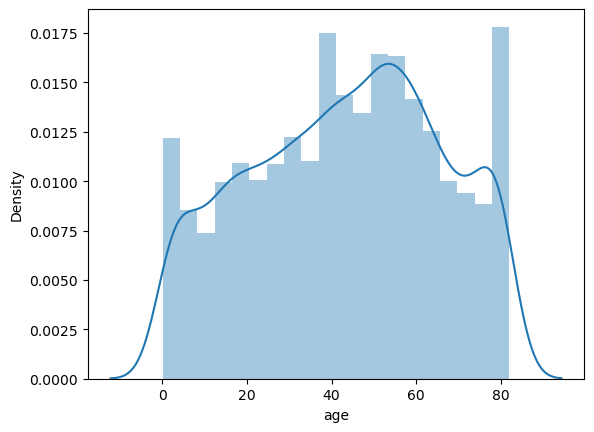

In [45]:
johnson.distplot(brother['age'])

In [46]:
# Returns a series with the count of unique values in the column named 
# 'Patient age quantile' of the investigation dataframe or series.

brother['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

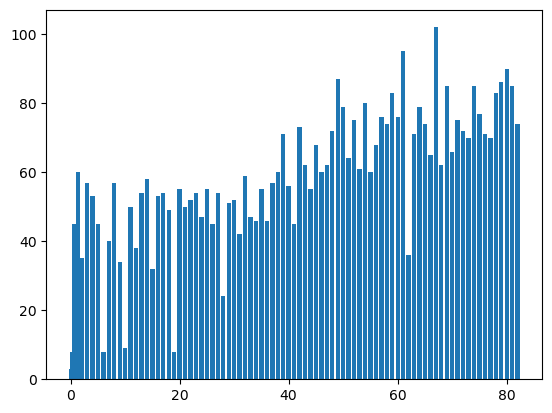

In [47]:
ash.bar(brother['age'].unique(), brother['age'].value_counts())

ash.show()

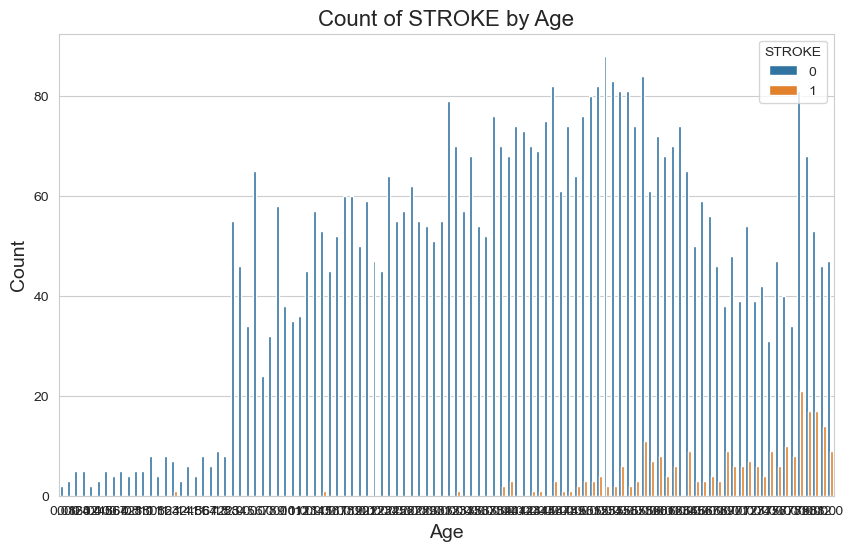

In [48]:
johnson.set_style('whitegrid')

ash.figure(figsize=(10,6))

johnson.countplot(x='age', hue='stroke', data=brother, palette=['#1f77b4','#ff7f0e'])
ash.title('Count of STROKE by Age', fontsize=16)
ash.xlabel('Age', fontsize=14)
ash.ylabel('Count', fontsize=14)
ash.legend(title='STROKE', loc='upper right', labels=['0', '1'])
ash.show()

## We Visualise Gender demographics bar graph

In [49]:
maggie = brother['gender'].value_counts().reset_index()
fig = px.pie(maggie, values = 'gender', names = 'index', title = 'Gender')
fig.show()

# Display frequency distribution table

In [50]:
# A contingency table is a table that displays the frequency distribution of two or more variables. 
# In this case, the output table will show the frequency of occurrences of 'SARS-Cov-2 exam result' 
# and 'Influenza A' variables in the data, and how often they occur together

ashcroft.crosstab(brother['stroke'], brother['hypertension'])

hypertension     0    1
stroke                 
0             4429  432
1              183   66

In [51]:
ashcroft.crosstab(brother['stroke'], brother['avg_glucose_level'])

avg_glucose_level  55.12   55.22   55.23   55.25   55.26   55.27   55.28   \
stroke                                                                      
0                       1       1       1       1       1       1       1   
1                       0       0       0       0       0       0       0   

avg_glucose_level  55.32   55.34   55.35   ...  259.63  260.85  261.67  \
stroke                                     ...                           
0                       1       2       1  ...       0       1       1   
1                       0       0       0  ...       1       0       0   

avg_glucose_level  263.32  263.56  266.59  267.60  267.61  267.76  271.74  
stroke                                                                     
0                       0       1       1       1       1       1       0  
1                       1       0       0       0       0       0       1  

[2 rows x 3979 columns]

In [52]:
ashcroft.crosstab(brother['avg_glucose_level'], brother['hypertension'])

hypertension       0  1
avg_glucose_level      
55.12              1  0
55.22              1  0
55.23              1  0
55.25              1  0
55.26              1  0
...               .. ..
266.59             1  0
267.60             0  1
267.61             1  0
267.76             1  0
271.74             0  1

[3979 rows x 2 columns]

In [53]:
# returns an array of unique values of the column 
# named 'SARS-Cov-2 exam result' in the dataframe or series data.

brother['stroke'].unique()

array([1, 0], dtype=int64)

In [54]:
find_corr_matrix = brother.corr().abs()
print(find_corr_matrix) 

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550       0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease      0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                    

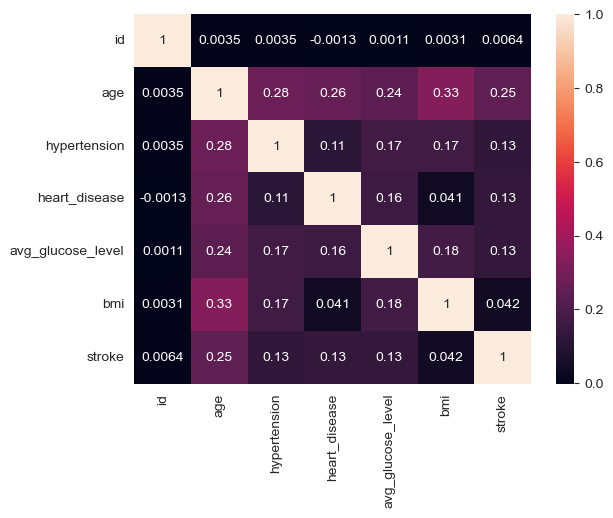

In [55]:
find_corrMatrix = brother.corr()
johnson.heatmap(find_corrMatrix, annot=True)
ash.show()

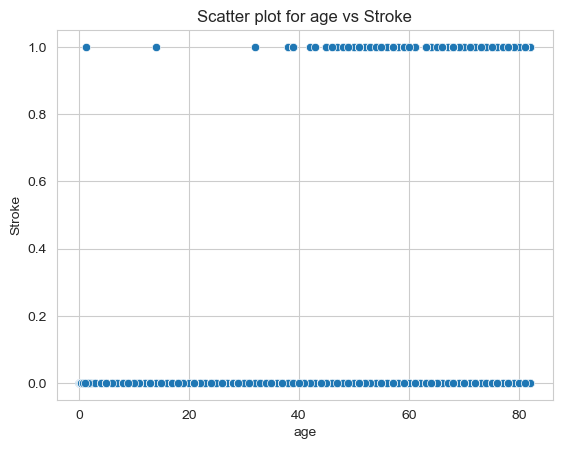

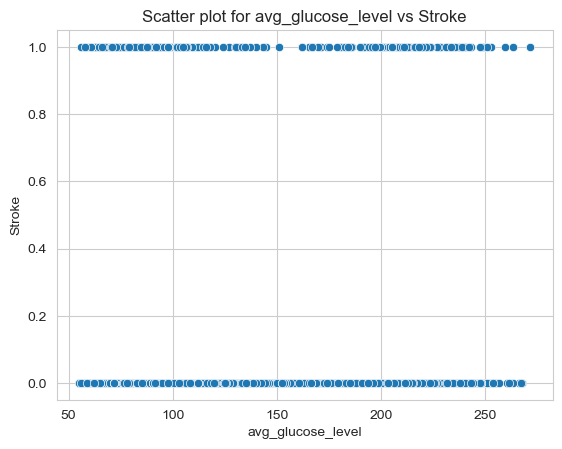

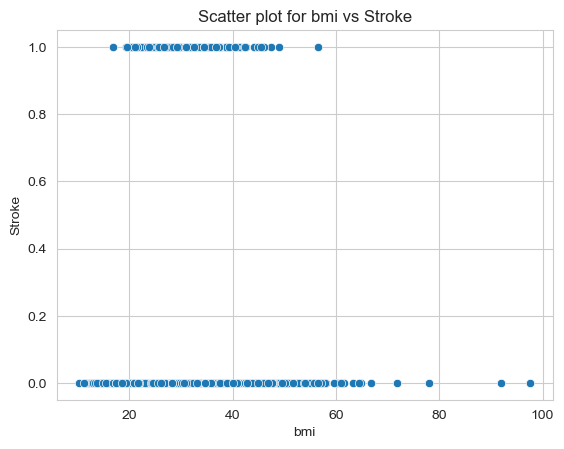

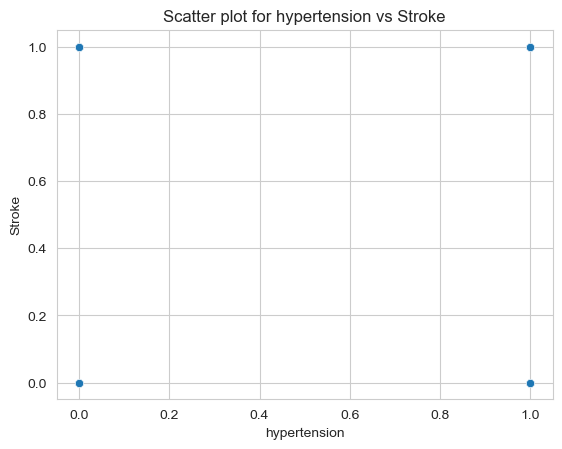

In [56]:
# The resulting output will be a series of scatter plots,
# one for each column in results_blood_per_columns, with patient age quantile on the x-axis, 
# the blood test result on the y-axis, and color-coded points based on the SARS-Cov-2 exam result
# The linear regression line on each plot represents the relationship between the age and blood test result,
# with the slope and direction indicating the strength and direction of the relationship. 
# The hue argument allows for easy comparison of the blood test results between patients who tested positive
# and negative for SARS-Cov-2.

# Select the numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension']

# Create scatter plots for each numerical feature against "stroke"
for feature in numerical_columns:
    johnson.scatterplot(x=feature, y='stroke', data=brother)
    ash.title(f'Scatter plot for {feature} vs Stroke')
    ash.xlabel(feature)
    ash.ylabel('Stroke')
    ash.show()

# Using PieChart to visualise the distribution of all categorical variables:

1. We can effectively visualise the distribution of all categorical variables 
2. in the dataset using individual Pie charts for each variable. 
3. It provides a clear view of the frequency of each category within each variable.

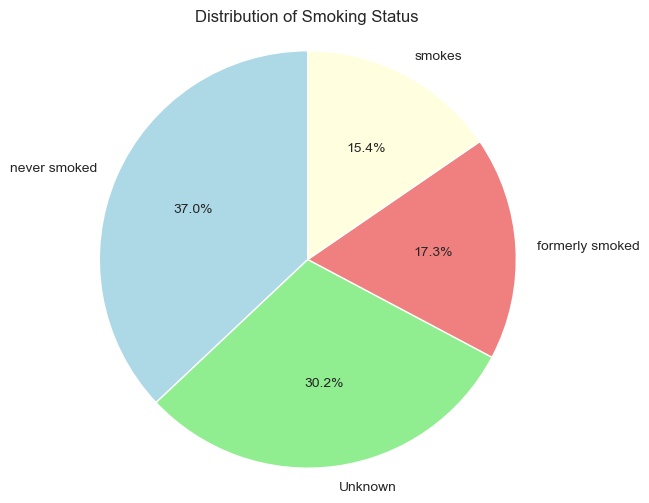

In [57]:
# we have already loaded the data into the DataFrame 'brother'

# Count the occurrences of each smoking status category
smoking_counts = brother['smoking_status'].value_counts()

# Create a pie chart
ash.figure(figsize=(6, 6))
ash.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ash.title('Distribution of Smoking Status')
ash.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ash.show()

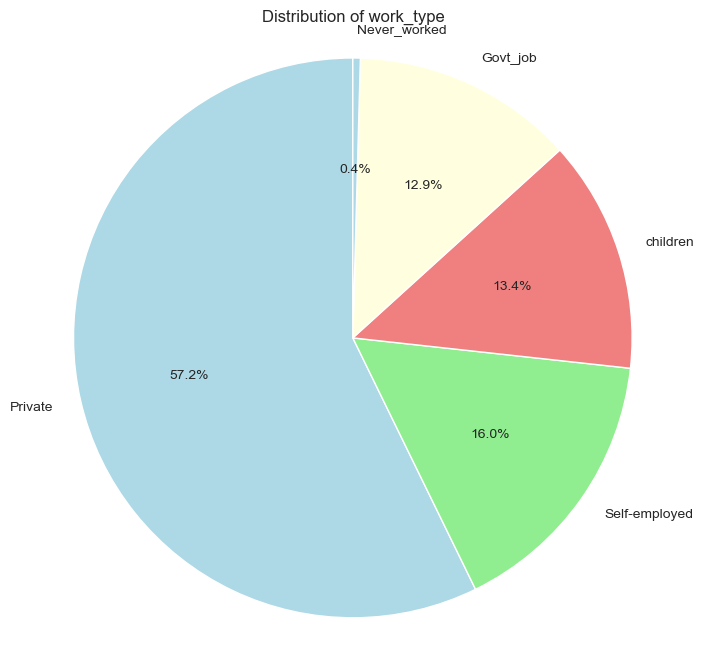

In [58]:
# Count the occurrences of each smoking status category
smoking_counts = brother['work_type'].value_counts()

# Create a pie chart
ash.figure(figsize=(8, 8))
ash.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ash.title('Distribution of work_type')
ash.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ash.show()

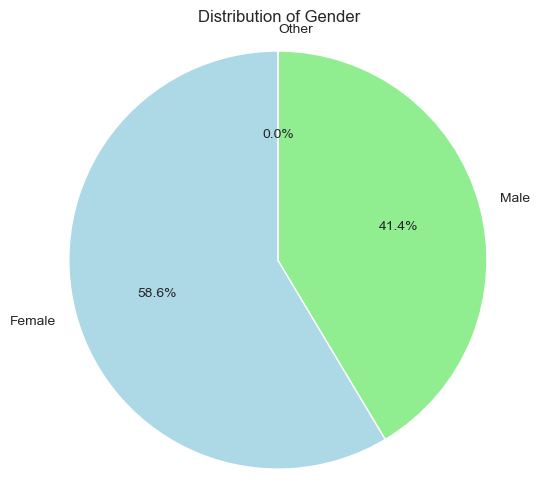

In [59]:
# we have already loaded the data into the DataFrame 'brother'

# Count the occurrences of each smoking status category
smoking_counts = brother['gender'].value_counts()

# Create a pie chart
ash.figure(figsize=(6, 6))
ash.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ash.title('Distribution of Gender')
ash.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ash.show()

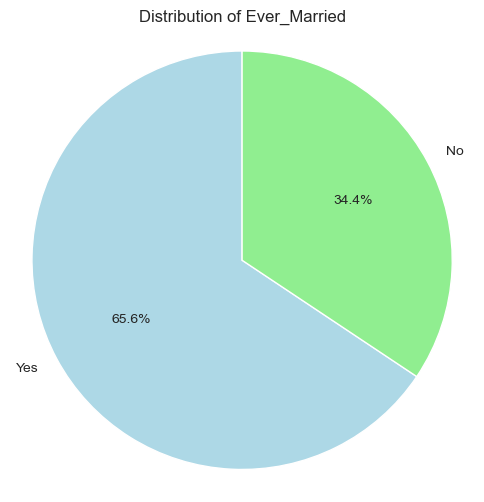

In [60]:
# we have already loaded the data into the DataFrame 'brother'

# Count the occurrences of each smoking status category
smoking_counts = brother['ever_married'].value_counts()

# Create a pie chart
ash.figure(figsize=(6, 6))
ash.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ash.title('Distribution of Ever_Married')
ash.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ash.show()

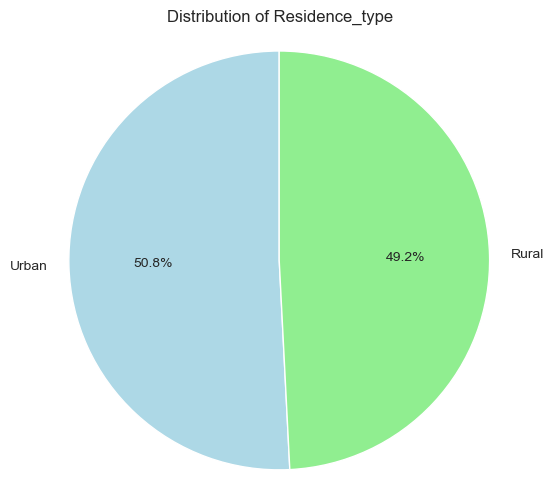

In [61]:
# we have already loaded the data into the DataFrame 'brother'

# Count the occurrences of each smoking status category
smoking_counts = brother['Residence_type'].value_counts()

# Create a pie chart
ash.figure(figsize=(6, 6))
ash.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
ash.title('Distribution of Residence_type')
ash.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

ash.show()

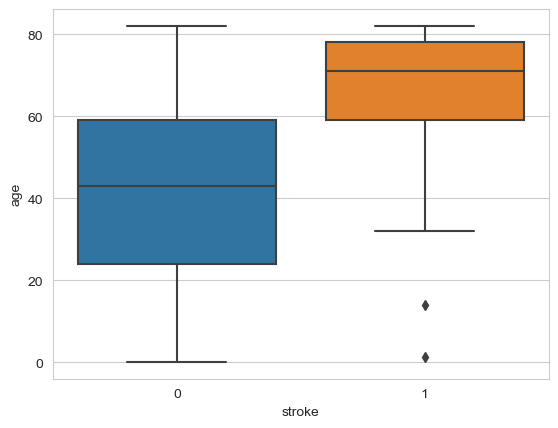

In [62]:
johnson.boxplot(x='stroke', y='age', data=brother)
ash.show()

# Plot distribution of Stroke

1. The dataset containing the variables mentioned and the target variable 'Stroke', 
2. we use matplotlib library to plot the distribution. Here's an example code

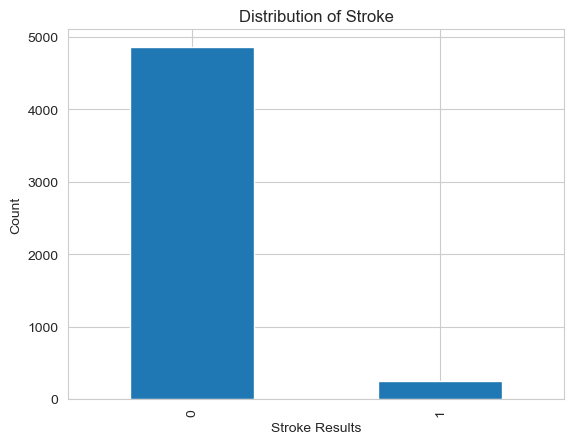

In [63]:
# plot distribution of SARS-Cov-2 exam result
brother['stroke'].value_counts().plot(kind='bar')
ash.title('Distribution of Stroke')
ash.xlabel('Stroke Results')
ash.ylabel('Count')
ash.show()

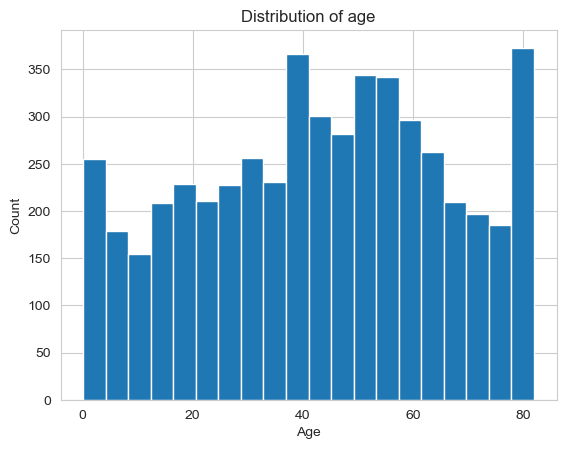

In [64]:
# plot distribution of patient age

brother['age'].hist(bins=20)
ash.title('Distribution of age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

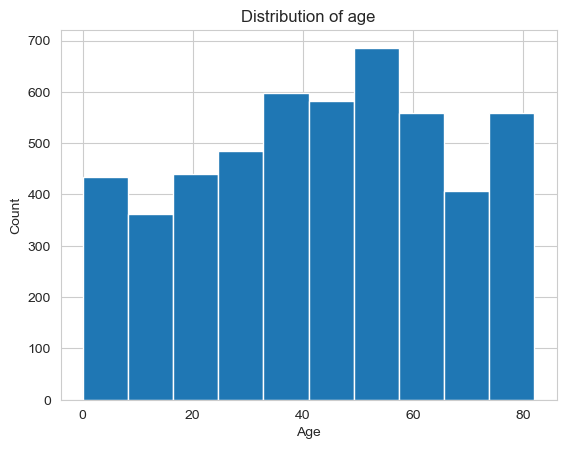

In [65]:
brother['age'].hist(bins=10)
ash.title('Distribution of age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

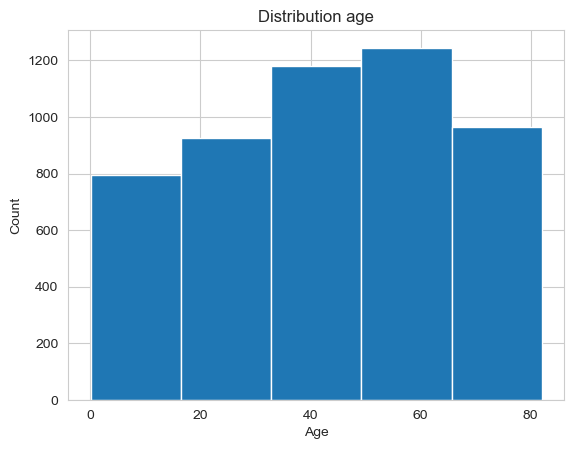

In [66]:
brother['age'].hist(bins=5)
ash.title('Distribution age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

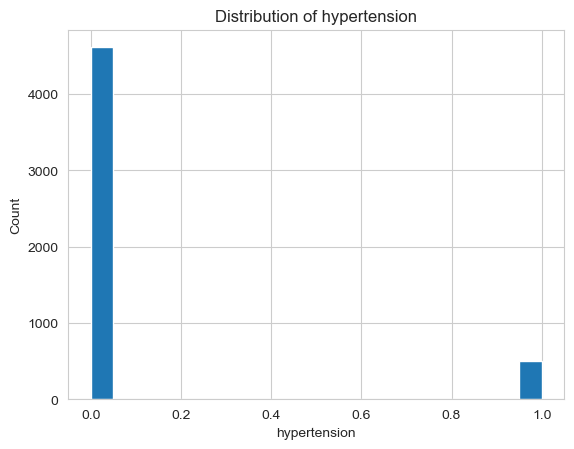

In [67]:
# plot distribution of hematocrit

brother['hypertension'].hist(bins=20)
ash.title('Distribution of hypertension')
ash.xlabel('hypertension')
ash.ylabel('Count')
ash.show()

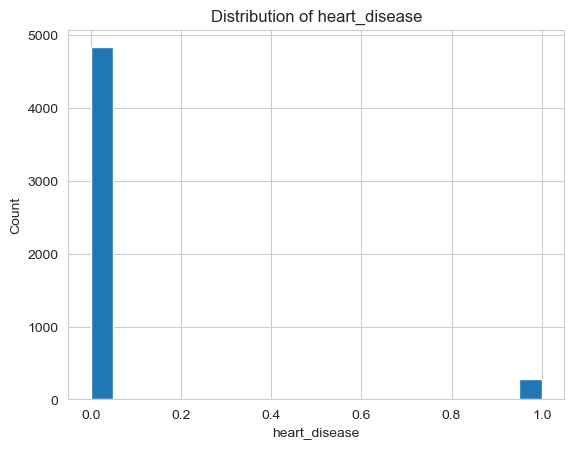

In [68]:
brother['heart_disease'].hist(bins=20)
ash.title('Distribution of heart_disease')
ash.xlabel('heart_disease')
ash.ylabel('Count')
ash.show()

# Visualisations can help us understand the data 

1. We perform univariate analysis on to understand the categorical features:

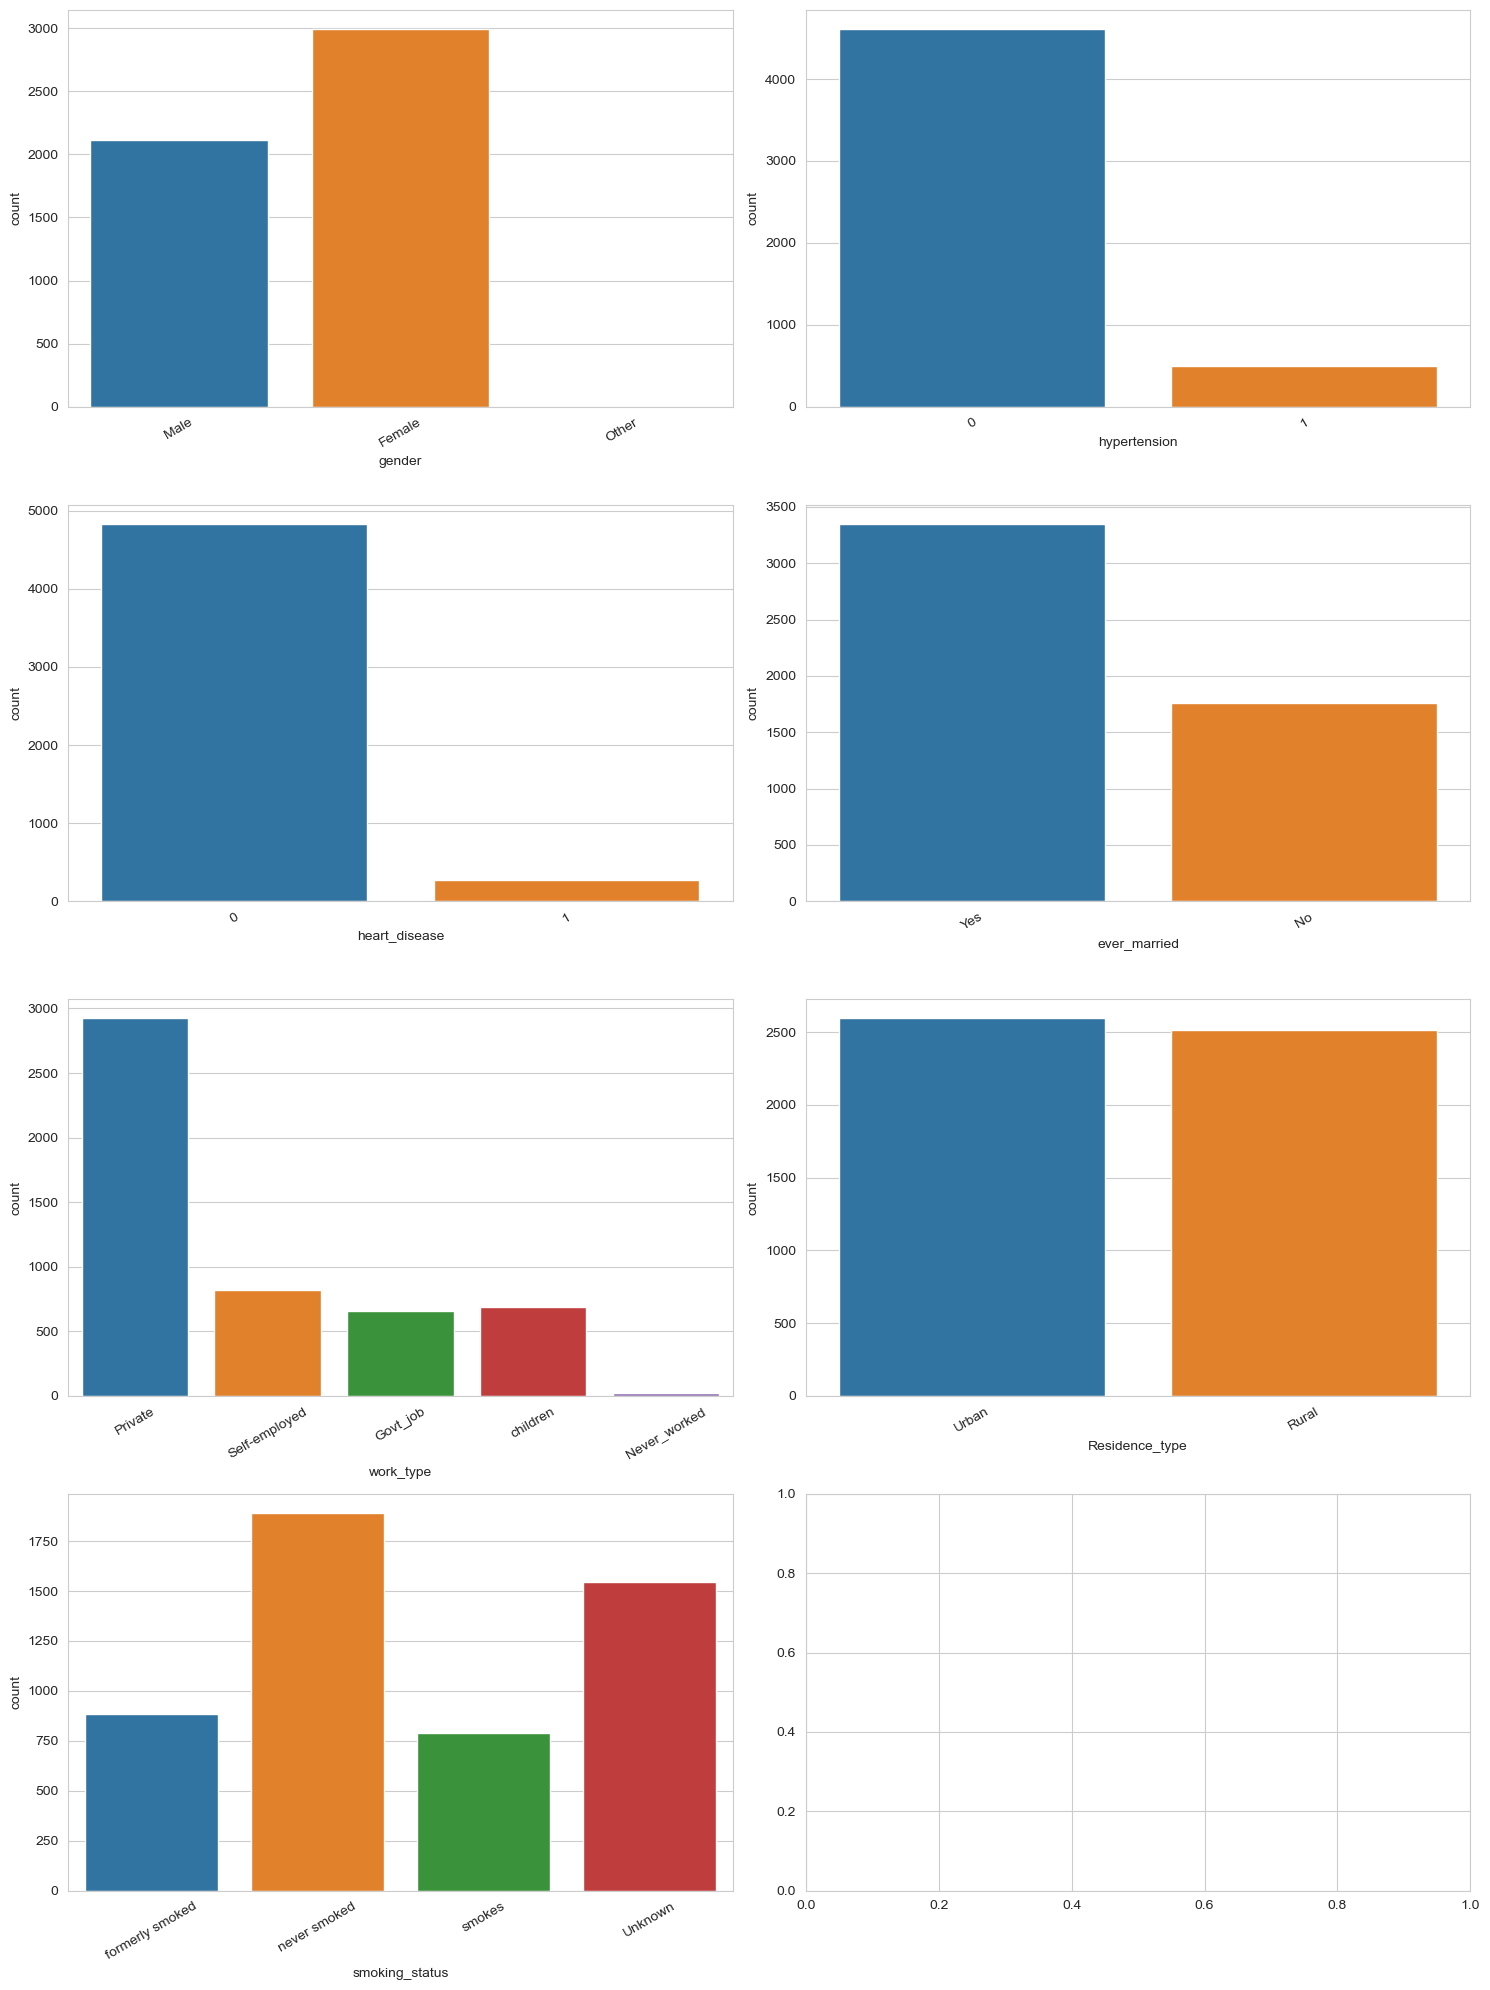

In [69]:
# We Listed some of the categorical variables
variables_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# We Plotted the bar plots
fig, axs = ash.subplots(nrows=4, ncols=2, figsize=(15, 20))

for variables, subplot in zip(variables_categorical, axs.flatten()):
    johnson.countplot(x=variables, data=brother, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

ash.tight_layout()
ash.show()

# Visualising all the continuous variables found within the data

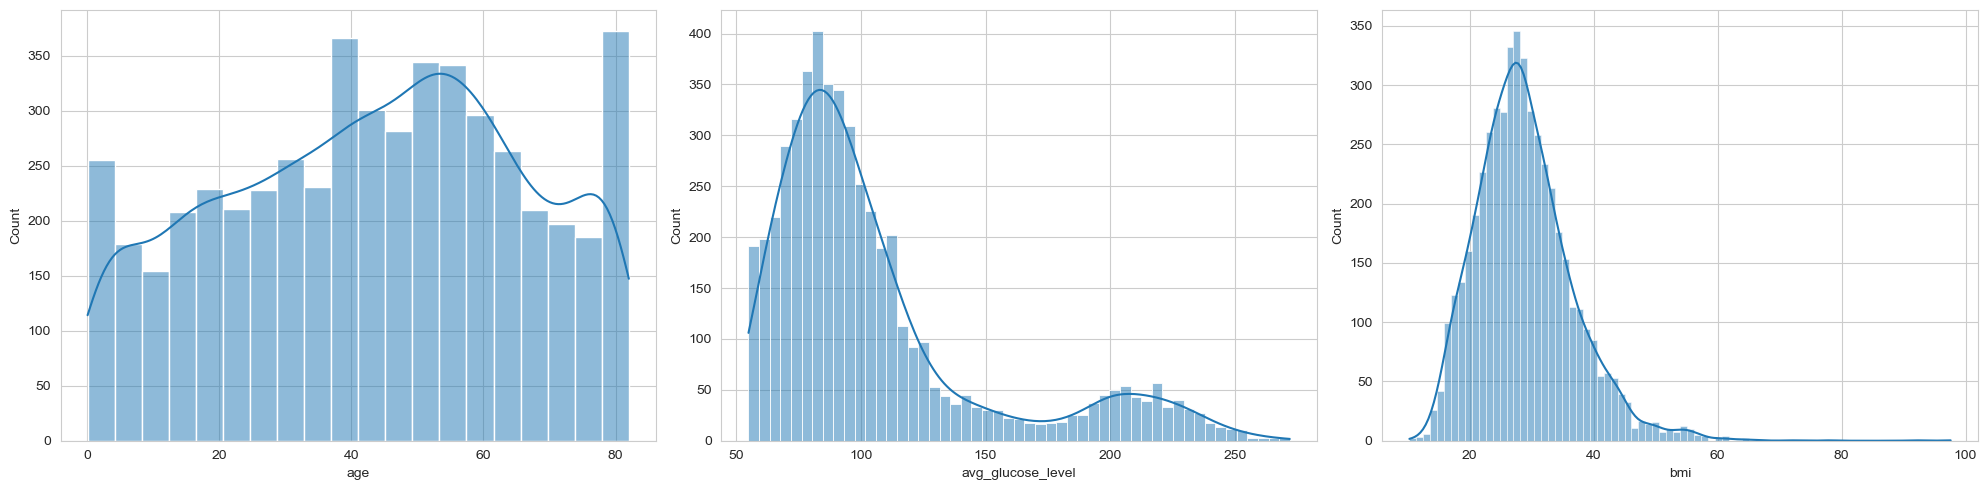

In [70]:

variables_continuous = ['age', 'avg_glucose_level', 'bmi']

# We plot the histograms for continuous variables
fig, axs = ash.subplots(1, 3, figsize=(20, 5))

for continuous, subplot in zip(variables_continuous, axs.flatten()):
    johnson.histplot(brother[continuous], kde=True, ax=subplot)

ash.tight_layout()
ash.show()

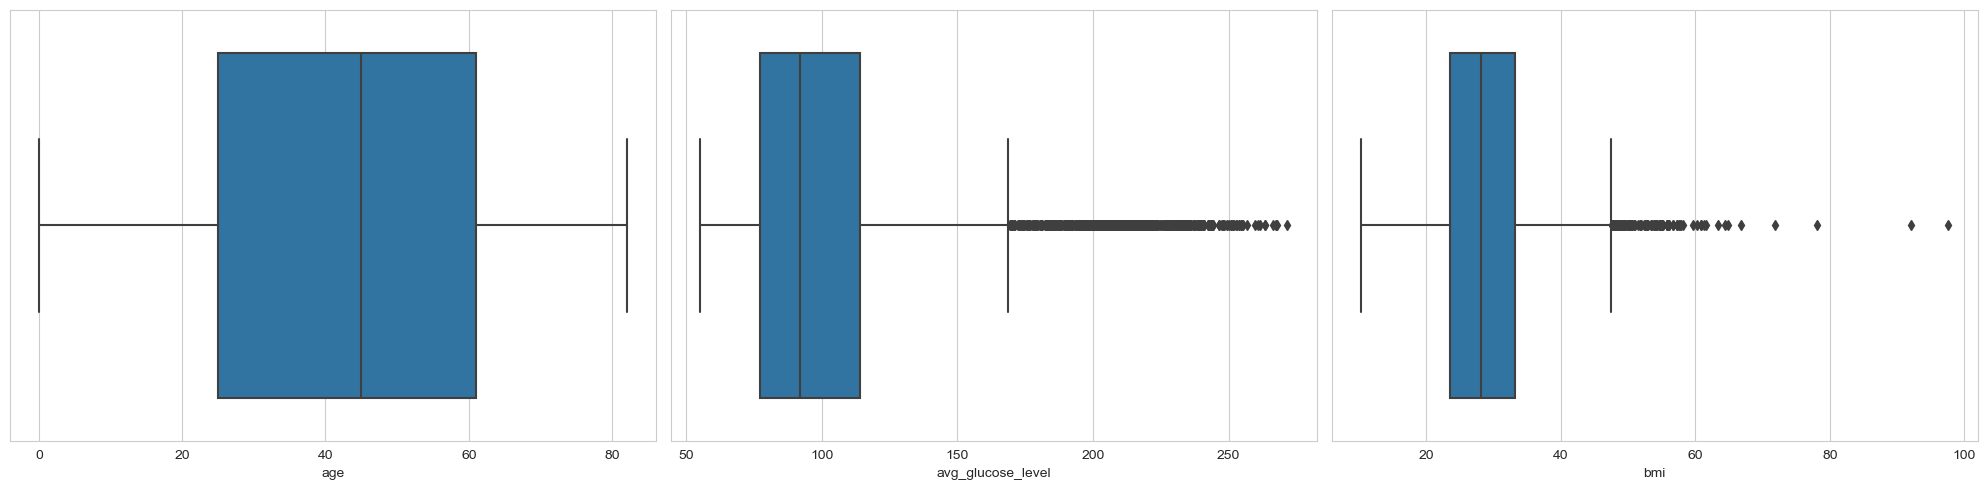

In [71]:
# Plot the boxplots for continuous variables
fig, axs = ash.subplots(1, 3, figsize=(20, 5))

for continuous, subplot in zip(variables_continuous, axs.flatten()):
    johnson.boxplot(brother[continuous], ax=subplot)

ash.tight_layout()
ash.show()

# Bivariate Analysis

1. In bivariate analysis, the two variables can be of any type, such as numerical (continuous or discrete) or categorical. 
2. The main objective is to determine whether there is a correlation, association, or dependency between the two variables. 3. This analysis is crucial for identifying patterns, making predictions, and gaining insights into the data

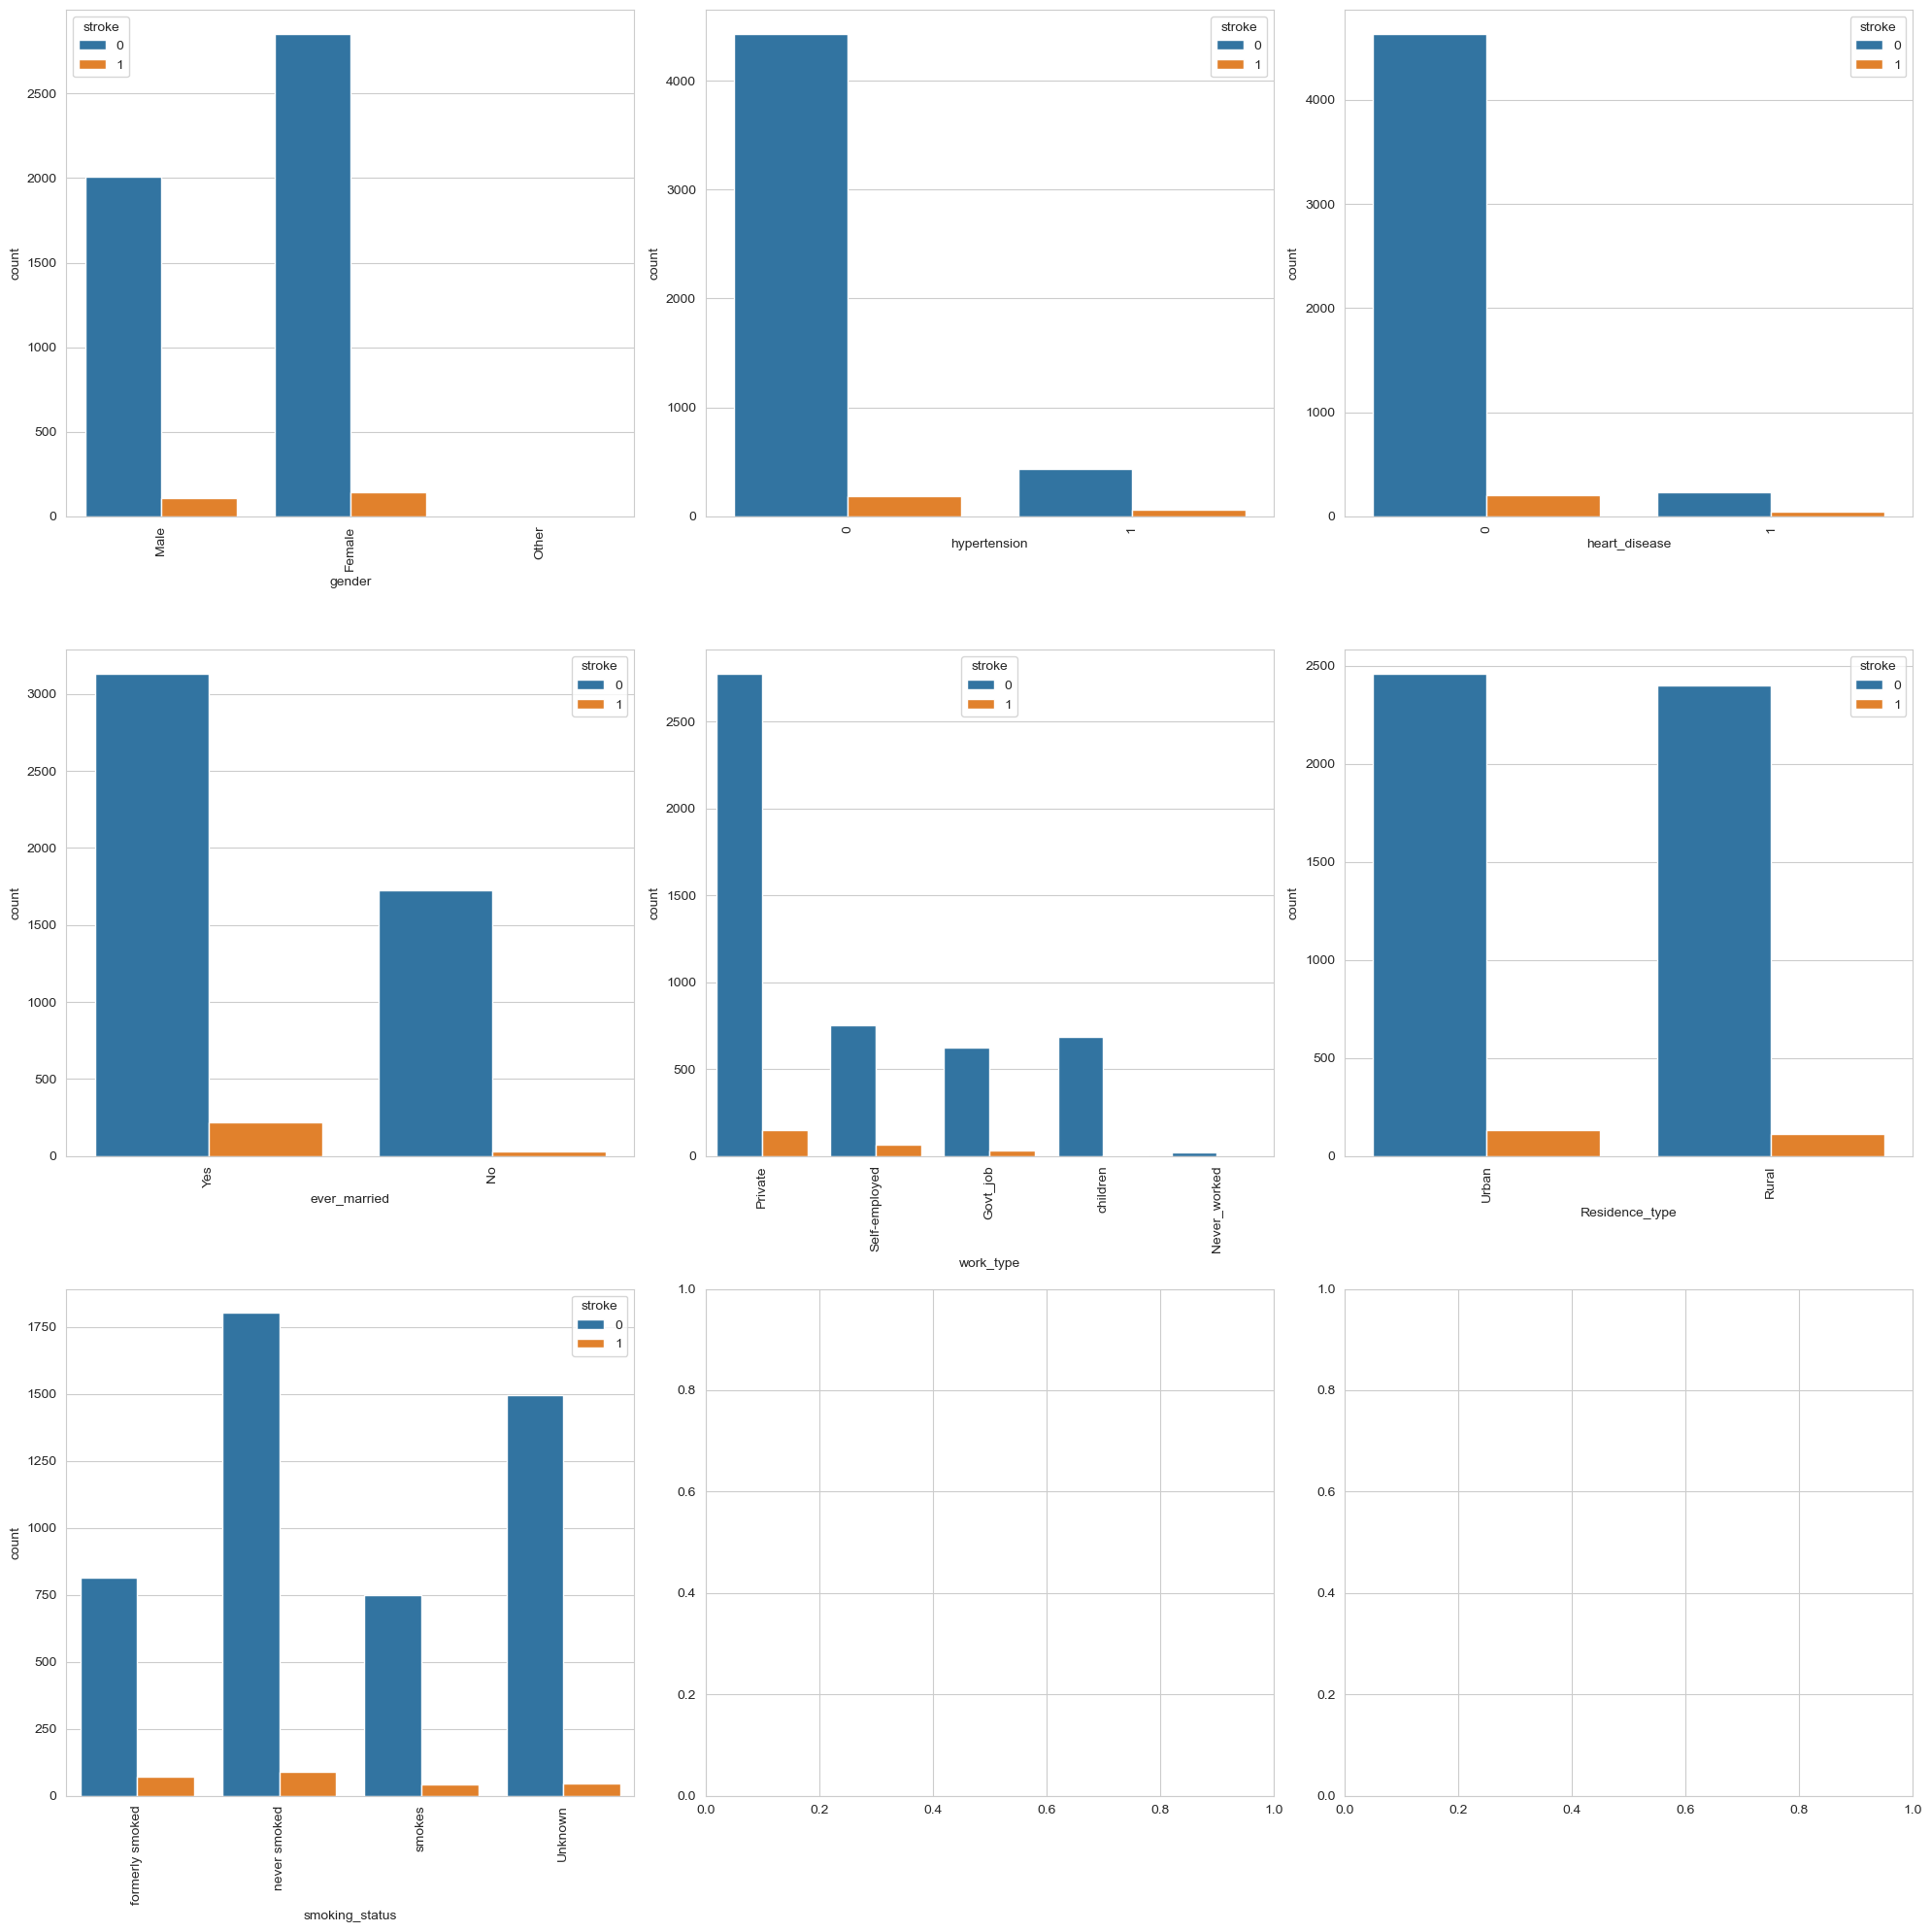

In [72]:
# We Plot the categorical variables against the target variable 'stroke'
fig, axs = ash.subplots(3, 3, figsize=(20, 20))

for cate, subplot in zip(variables_categorical, axs.flatten()):
    johnson.countplot(x=brother[cate], hue=brother['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

ash.tight_layout()
ash.show()

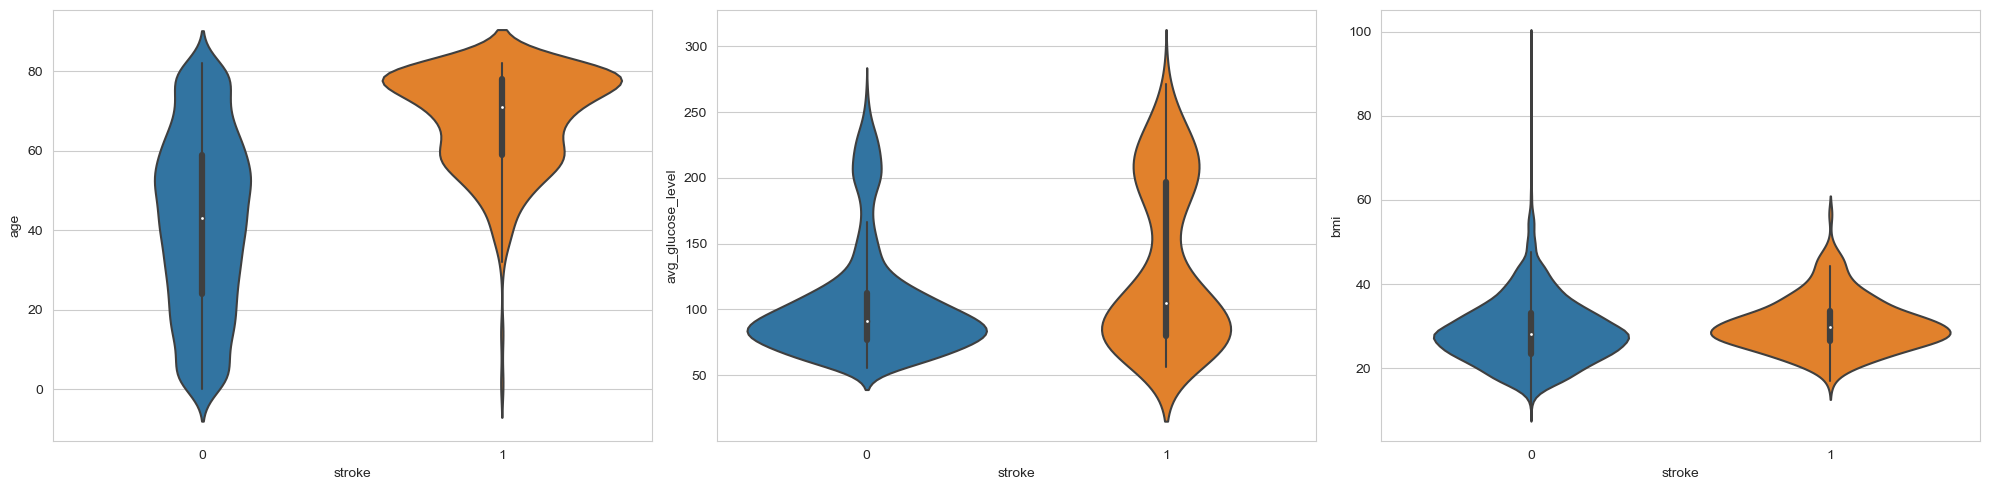

In [73]:
# We plotted the continuous variables found within the against the target variable 'stroke'
fig, axs = ash.subplots(1, 3, figsize=(20, 5))

for cont_var, subplot in zip(variables_continuous, axs.flatten()):
    johnson.violinplot(x=brother['stroke'], y=brother[cont_var], ax=subplot)
ash.tight_layout()
ash.show()

# Visualisations

1. We present boxplots to healthcare dataset.

In [74]:
fig = px.box(brother, x = 'gender', y = 'age', color = 'gender')
fig.show()

In [75]:
apply_hyp = brother.groupby('gender')['hypertension'].sum().reset_index()
fig = px.bar(apply_hyp, x = 'gender', y = 'hypertension', title = 'Hypertension', color = 'gender')
fig.show()

apply_hyp_change = brother.groupby('gender')['hypertension'].mean().reset_index()
fig = px.bar(apply_hyp_change, x = 'gender', y = 'hypertension', color = 'gender')
fig.show()

In [76]:
heart_d = brother.groupby('gender')['heart_disease'].sum().reset_index()
fig = px.bar(heart_d, x = 'gender', y = 'heart_disease', title = 'Heart Disease', color = 'gender')
fig.show()

heart_d_novel= brother.groupby('gender')['heart_disease'].mean().reset_index()
fig = px.bar(heart_d_novel, x = 'gender', y = 'heart_disease', color = 'gender')
fig.show()

In [77]:
work = brother['work_type'].value_counts().reset_index()
fig = px.pie(work, values = 'work_type', names = 'index', title = 'Work Type')
fig.show()

work_group = brother.groupby(['work_type','gender']).size().reset_index(name = 'total')
fig = px.scatter(work_group, x = 'work_type', y = 'total', color = 'gender', title = 'Work Type and Gender')
fig.show()

In [78]:
resident= brother['Residence_type'].value_counts().reset_index()
fig = px.pie(resident, values = 'Residence_type', names = 'index', title = 'Residence Type')
fig.show()

resident_home = brother.groupby(['Residence_type','gender']).size().reset_index(name = 'total')
fig = px.bar(resident_home, x = 'gender', y = 'total', color = 'Residence_type', title = 'Residence Type and Gender', barmode = 'group')
fig.show()

In [79]:
level = brother.groupby('gender')['avg_glucose_level'].sum().reset_index()
fig = px.bar(level, x = 'gender', y = 'avg_glucose_level', title = 'Average Glucose Level', color = 'gender')
fig.show()

level_gluc = brother.groupby('gender')['avg_glucose_level'].mean().reset_index()
fig = px.bar(level_gluc, x = 'gender', y = 'avg_glucose_level', color = 'gender')
fig.show()

In [80]:
bmi_check = brother.groupby('gender')['bmi'].sum().reset_index()
fig = px.bar(bmi_check, x = 'gender', y = 'bmi', title = 'BMI', color = 'gender')
fig.show()

bmi_check_daily= brother.groupby('gender')['bmi'].mean().reset_index()
fig = px.bar(bmi_check_daily, x = 'gender', y = 'bmi', color = 'gender')
fig.show()

In [81]:
smoke = brother['smoking_status'].value_counts().reset_index()
fig = px.pie(smoke, values = 'smoking_status', names = 'index', title = 'Smoking Status')
fig.show()

smoke_monitor= brother.groupby(['smoking_status','gender']).size().reset_index(name = 'total')
fig = px.bar(smoke_monitor, x = 'gender', y = 'total', color = 'smoking_status', title = 'Smoking Status and Gender', barmode = 'group')
fig.show()

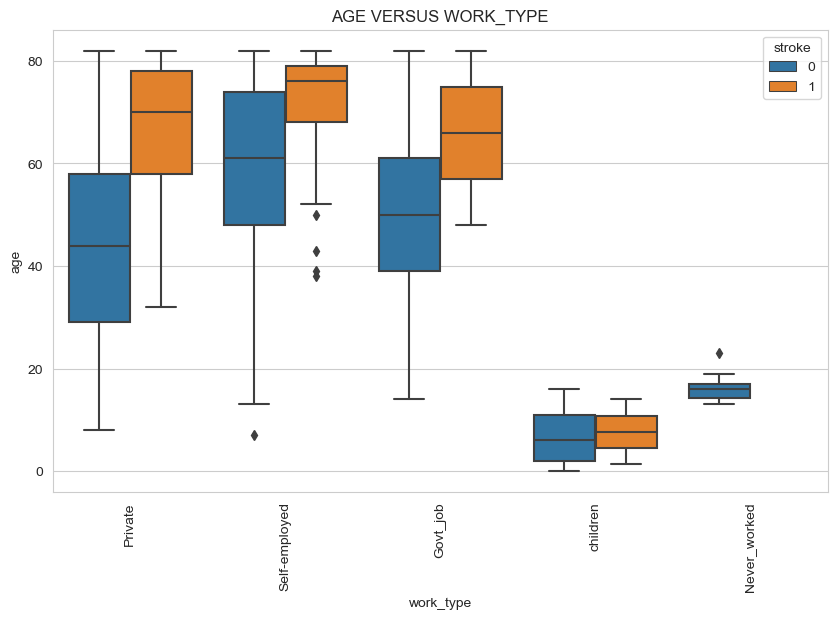

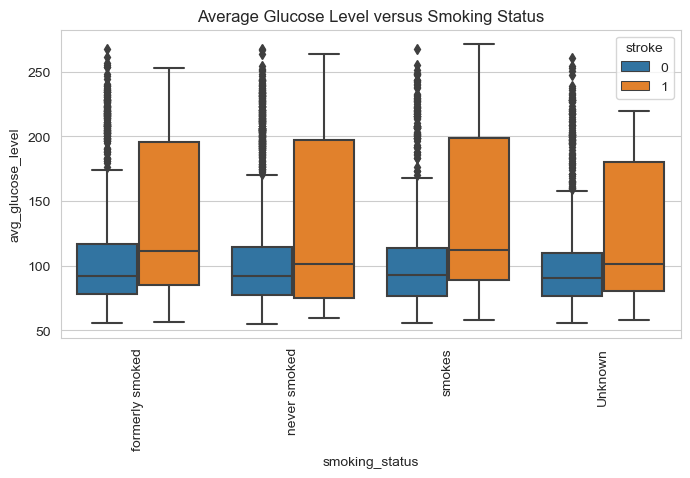

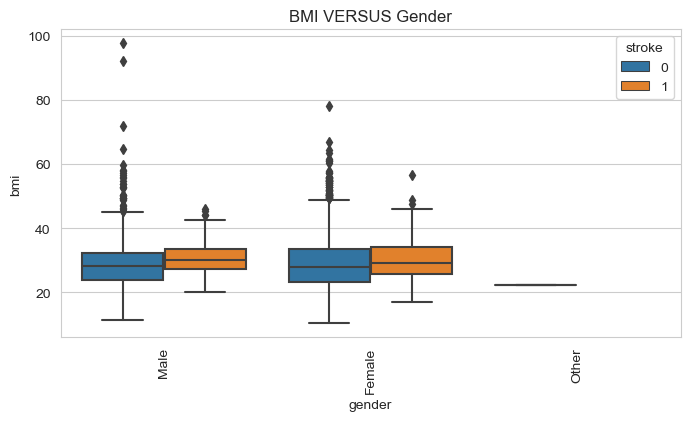

In [82]:
# We present the Boxplot of 'age' versus 'work_type'
ash.figure(figsize=(10, 6))
johnson.boxplot(x=brother['work_type'], y=brother['age'], hue=brother['stroke'])
ash.title('AGE VERSUS WORK_TYPE')
ash.xticks(rotation=90)
ash.show()

# We present the Boxplot of 'avg_glucose_level'versus 'smoking_status'
ash.figure(figsize=(8, 4))
johnson.boxplot(x=brother['smoking_status'], y=brother['avg_glucose_level'], hue=brother['stroke'])
ash.title('Average Glucose Level versus Smoking Status')
ash.xticks(rotation=90)
ash.show()

# We present the Boxplot of 'bmi' versus 'gender'
ash.figure(figsize=(8, 4))
johnson.boxplot(x=brother['gender'], y=brother['bmi'], hue=brother['stroke'])
ash.title('BMI VERSUS Gender')
ash.xticks(rotation=90)
ash.show()

# Below are the visualisation of pairplots:

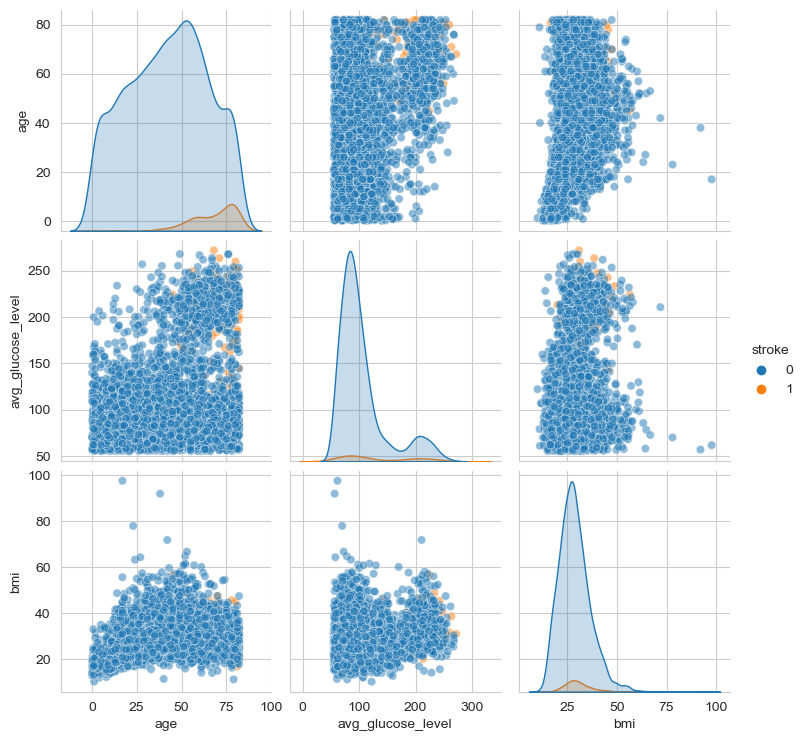

In [83]:
# We Subset the data for the pairplot
ash_pair = brother[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# We converted 'stroke' to a categorical variable for the pairplot
ash_pair['stroke'] = ash_pair['stroke'].astype('category')

# We generate the pairplot
johnson.pairplot(ash_pair, hue='stroke', plot_kws={'alpha': 0.5})
ash.show()

# Pairplot to visualise the relationships between the numerical features and the target variable "stroke
1. we use box plots to show the distribution of age with respect to hypertension 
2. and heart disease, separated by stroke status. 
3. We also create scatter plots to observe the relationship between average glucose level and BMI against stroke, 
4. and a bar plot to see the stroke probability with respect to hypertension and heart disease.

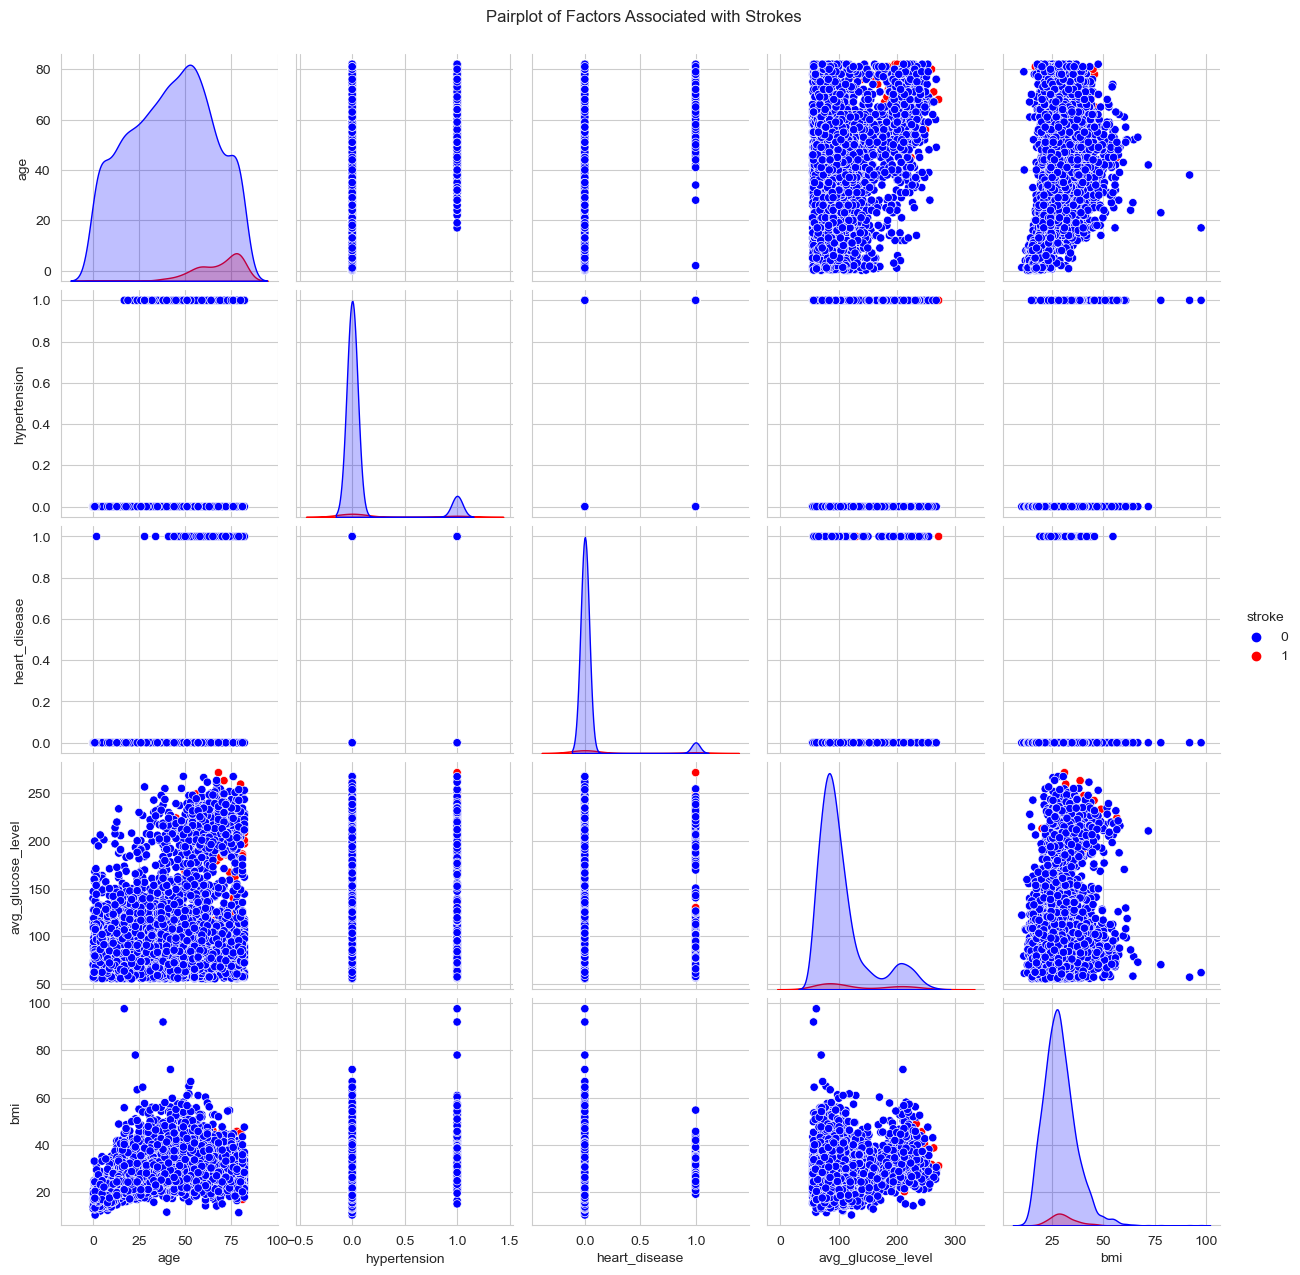

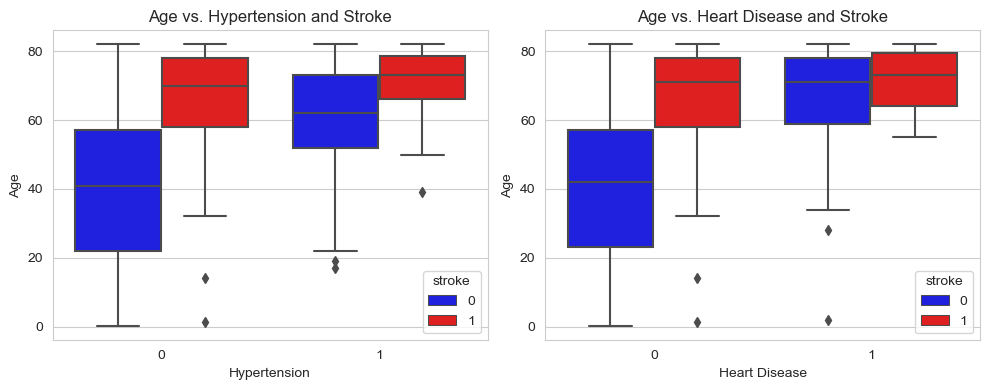

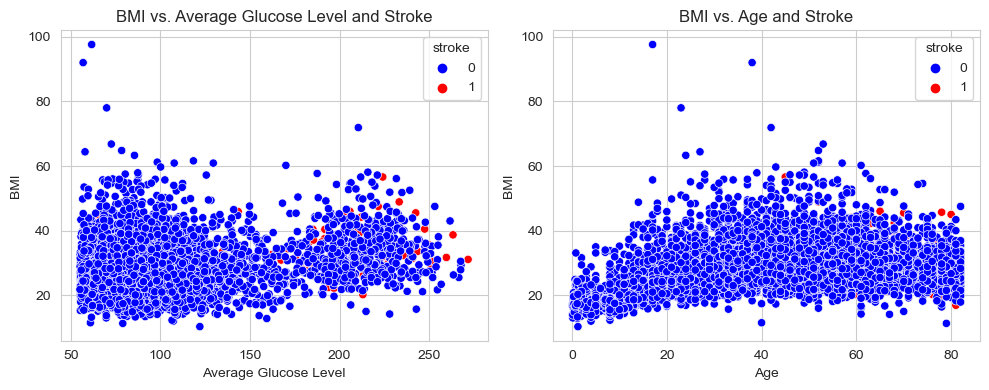

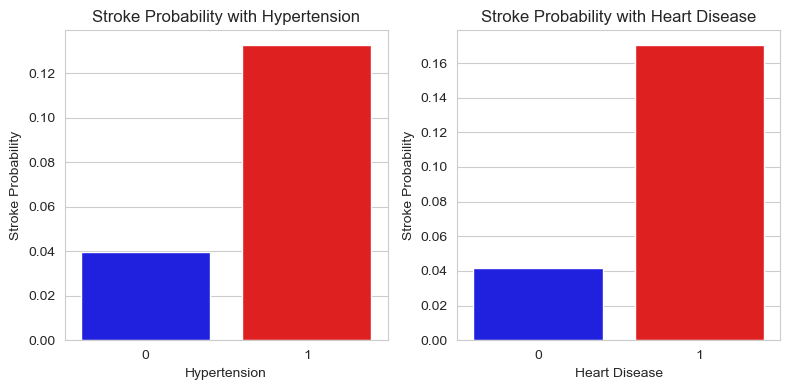

In [84]:
# Selecting the relevant features and target variable
selected_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
brother_selected = brother[selected_features]

# Pairplot for numerical features
johnson.pairplot(brother_selected , hue="stroke", diag_kind="kde", palette={0: "blue", 1: "red"})
ash.suptitle("Pairplot of Factors Associated with Strokes", y=1.02)
ash.show()

# Box plots for categorical features against stroke
ash.figure(figsize=(10, 4))
ash.subplot(1, 2, 1)
johnson.boxplot(x="hypertension", y="age", hue="stroke", data=brother, palette={0: "blue", 1: "red"})
ash.xlabel("Hypertension")
ash.ylabel("Age")
ash.title("Age vs. Hypertension and Stroke")

ash.subplot(1, 2, 2)
johnson.boxplot(x="heart_disease", y="age", hue="stroke", data=brother, palette={0: "blue", 1: "red"})
ash.xlabel("Heart Disease")
ash.ylabel("Age")
ash.title("Age vs. Heart Disease and Stroke")

ash.tight_layout()
ash.show()

# Scatter plots for numerical features against stroke
ash.figure(figsize=(10, 4))
ash.subplot(1, 2, 1)
johnson.scatterplot(x="avg_glucose_level", y="bmi", hue="stroke", data=brother, palette={0: "blue", 1: "red"})
ash.xlabel("Average Glucose Level")
ash.ylabel("BMI")
ash.title("BMI vs. Average Glucose Level and Stroke")

ash.subplot(1, 2, 2)
johnson.scatterplot(x="age", y="bmi", hue="stroke", data=brother, palette={0: "blue", 1: "red"})
ash.xlabel("Age")
ash.ylabel("BMI")
ash.title("BMI vs. Age and Stroke")

ash.tight_layout()
ash.show()

# Bar plots for hypertension and heart disease against stroke
ash.figure(figsize=(8, 4))
ash.subplot(1, 2, 1)
johnson.barplot(x="hypertension", y="stroke", data=brother, ci=None, palette={0: "blue", 1: "red"})
ash.xlabel("Hypertension")
ash.ylabel("Stroke Probability")
ash.title("Stroke Probability with Hypertension")

ash.subplot(1, 2, 2)
johnson.barplot(x="heart_disease", y="stroke", data=brother, ci=None, palette={0: "blue", 1: "red"})
ash.xlabel("Heart Disease")
ash.ylabel("Stroke Probability")
ash.title("Stroke Probability with Heart Disease")

ash.tight_layout()
ash.show()

# Data Cleaning:

1. Handling NaN Values found within BMI Column Using Mean

2. Replace "Unknown" values with the mode value

In [85]:
# Convert "bmi" column to numeric data type
brother["bmi"] = ashcroft.to_numeric(brother["bmi"], errors='coerce')

# Calculate the mean of the "bmi" column (excluding NaN values)
bmi_mean = brother["bmi"].mean()

# Impute missing "bmi" values with the mean
brother["bmi"].fillna(bmi_mean, inplace=True)

# Print the DataFrame after imputation
print(brother)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

# We look for deuplicates in the dataset

In [86]:
# We code below check for duplicate rows
rows_duplicate = brother.duplicated()

# We count the number of duplicate  found within rows
count_duplicate_rows = rows_duplicate.sum()

count_duplicate_rows

0

# Using the Mode Imputation Technique

In [87]:
# Function for mode imputation
def mode_imputation(brother, column_name):
    # Calculate the mode of the column (excluding "Unknown")
    mode_value = brother[column_name][brother[column_name] != 'Unknown'].mode().iloc[0]
    
    # Replace "Unknown" values with the mode value
    brother[column_name] = brother[column_name].replace('Unknown', mode_value)
    return brother

# Call the mode_imputation function
brother_imputed = mode_imputation(brother, 'smoking_status')

# Display the DataFrame after mode imputation
print(brother_imputed)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

# Get the Numerical Columns & Categorical Columns

1. First we print all numerical, then categorical

In [88]:
# Get the numerical columns
numerical_columns = brother_imputed.select_dtypes(include='number').columns

# Print out the numerical columns
print("Numerical Columns:")
for column in numerical_columns:
    print(numerical_columns)

Numerical Columns:
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [89]:
for col_name in brother.columns:
    if brother[col_name].dtypes == 'object':
        unique_cat = len(brother[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name =col_name, unique_cat=unique_cat))

Feature 'gender' has 3 categories
Feature 'ever_married' has 2 categories
Feature 'work_type' has 5 categories
Feature 'Residence_type' has 2 categories
Feature 'smoking_status' has 3 categories


# Drop the "id" column permanently from the data

In [90]:

# Drop the "id" column permanently
brother_imputed.drop('id', axis=1, inplace=True)

# Display the DataFrame after dropping the "id" column
print(brother_imputed)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

# Data Transformation


## To convert categorical features into numerical features:


1. Data encoding: This involves converting categorical or text data into numerical representations that can be processed by algorithms, such as label encoding or one-hot encoding

2. Data reshaping: This involves transforming data from one structure or layout to another, such as converting data from wide format to long format, or vice versa

1. We use one-hot encoding. This will create new columns for each possible value of a categorical column

2. get dummies method been applied.

2. and assign a 1 or 0 to each row depending on the value of the original column

# Feature Engineering

1. We apply One Hot Encoding to the the categorical variables

In [91]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
brother_encoded = ashcroft.get_dummies(brother_imputed, columns=categorical_columns)

# Get a list of non-categorical columns by excluding the original categorical columns
non_categorical_columns = [col for col in brother_encoded.columns if col not in categorical_columns]

# Keep only the non-categorical columns in the DataFrame
brother_encoded = brother_encoded[non_categorical_columns]

# Display the DataFrame after dropping the original categorical variables
print(brother_encoded)

       age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0     67.0             0              1             228.69  36.600000       1   
1     61.0             0              0             202.21  28.893237       1   
2     80.0             0              1             105.92  32.500000       1   
3     49.0             0              0             171.23  34.400000       1   
4     79.0             1              0             174.12  24.000000       1   
...    ...           ...            ...                ...        ...     ...   
5105  80.0             1              0              83.75  28.893237       0   
5106  81.0             0              0             125.20  40.000000       0   
5107  35.0             0              0              82.99  30.600000       0   
5108  51.0             0              0             166.29  25.600000       0   
5109  44.0             0              0              85.28  26.200000       0   

      gender_Female  gender

## We Save all the data as CSV FILE 24/08/2023 @ 09:23

In [93]:
# Create a new DataFrame with a new name "new_dataframe"
# The original data was new_jj = brother_encoded.copy() 24/08/2023 by 08:16
claribel = brother_encoded.copy()


# Save the DataFrame as a CSV file to my laptop @ Home 24/08/2023 @ 22:14
#claribel.to_csv(r'C:\Users\ashcr\Downloads\claribel.csv', index=False)


# Assuming "brother_encoded" is your DataFrame
# Saving the DataFrame as a CSV file
claribel.to_csv("Ashcroft's Feature Engineering process.csv", index=False)

# Read the fully Completed Engnineering Phase Data

In [ ]:
import pandas as ashcroft

# Loading the CSV file into a DataFrame
new_jj = ashcroft.read_csv("Ashcroft's Feature Engineering process.csv")

new_jj.head(20)

# Correlation matrix on Stroke

1. After applying One-Hot Encoder(Get_dummies)

In [ ]:
# Compute the correlation matrix
correlation_matrix = new_jj.corr()

# Plot the heatmap
ash.figure(figsize=(8, 6))
johnson.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
ash.title('Heatmap of Stroke Correlation')
ash.show()

# Univariate analysis

1. Analyse each feature separately to gain insights into its distribution and characteristics

In [ ]:
# Numerical features
features = new_jj

# Histograms and Box plots for numerical features
for feature in features:
    ash.figure(figsize=(10, 4))
    ash.subplot(1, 2, 1)
    johnson.histplot(new_jj[feature], bins=20, kde=True)
    ash.xlabel(feature)
    ash.ylabel("Count")
    ash.title(f"Histogram of {feature}")

    ash.subplot(1, 2, 2)
    johnson.boxplot(y=new_jj[feature])
    ash.ylabel(feature)
    ash.title(f"Box Plot of {feature}")

    ash.tight_layout()
    ash.show()

# Bar plots for categorical features
for feature in features:
    ash.figure(figsize=(8, 6))
    johnson.barplot(x=new_jj[feature].value_counts().index, y=new_jj[feature].value_counts().values, ci=None)
    ash.xlabel(feature)
    ash.ylabel("Count")
    ash.title(f"Bar Plot of {feature}")
    ash.xticks(rotation=45)
    ash.show()

# Multivariate analysis
1. We explore the relationships between different features and the target variable "stroke."
2. We'll use various visualization techniques to gain insights into the data. 

# Function to Handle Outliers Using the Interquartile Range (IQR) method for numerical columns

In [ ]:

# We have already loaded the data into the DataFrame 'new_jj'

# Numerical features
numerical_features = ["age", "avg_glucose_level", "bmi"]

# Function to handle outliers using IQR method
def handle_outliers(new_jj, features):
    for feature in features:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = new_jj[feature].quantile(0.25)
        Q3 = new_jj[feature].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the nearest non-outlying values within the bounds
        new_jj[feature] = new_jj[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply the handle_outliers function to the DataFrame 'new_jj'
handle_outliers(new_jj, numerical_features)

# Optional: Visualize the box plots before and after handling outliers
ash.figure(figsize=(12, 6))
ash.subplot(1, 2, 1)
johnson.boxplot(data=new_jj[numerical_features])
ash.title("Box Plots Before Handling Outliers")

ash.subplot(1, 2, 2)
johnson.boxplot(data=new_jj[numerical_features])
ash.title("Box Plots After Handling Outliers")

ash.tight_layout()
ash.show()

# We print the values of Oultiers

1. We define our funtion to check for outliers within the preprocesed data.

In [ ]:
# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Check for outliers in 'age', 'avg_glucose_level', and 'bmi'
outliers = {column: count_outliers(new_jj[column]) for column in ['age', 'avg_glucose_level', 'bmi']}

outliers

# We check for the missing values before we apply feature selection:

In [ ]:
# Check for missing values
new_jj.isnull().sum()

# Feature Selection / Extraction

1. Correlation Analysis for feature and the target variable (Stroke)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = new_jj.corr()

# Get the correlation of each feature with the target variable "stroke"
correlation_with_target = correlation_matrix['stroke'].drop('stroke')

# Visualize the correlation using a heatmap
ash.figure(figsize=(10, 6))
johnson.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
ash.title('Correlation Heatmap')
ash.show()

# Sort the features by correlation with the target variable in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Print the features and their corresponding correlation with the target variable
print("Correlation with target (stroke):")
print(sorted_correlation)

# We proceed with the feature selection 

1. using correlation analysis, feature importance from tree-based models (Random Forest, XGBoost, and LightGBM), 

2. univariate feature selection (chi-square or ANOVA), and Principal Component Analysis (PCA):

In [ ]:
import pandas as ashcroft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Assuming 'new_jj' is the DataFrame containing your data
# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = ashcroft.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Combine PCA components with original features
X_combined = ashcroft.concat([X, X_pca_df], axis=1)

# Step 3: Perform feature selection using f_classif (for continuous features)
f_classif_selector = SelectKBest(score_func=f_classif, k=5)
X_f_classif_selected = f_classif_selector.fit_transform(X_combined, y)
selected_f_classif_indices = f_classif_selector.get_support(indices=True)
selected_f_classif_features = X_combined.columns[selected_f_classif_indices]
print("Selected f_classif features:", selected_f_classif_features)

In [ ]:
import pandas as ashcroft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA

# Assuming 'new_jj' is the DataFrame containing your data
# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = ashcroft.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Combine PCA components with original features
X_combined = ashcroft.concat([X, X_pca_df], axis=1)

# Step 3: Perform correlation analysis
correlation_matrix = X_combined.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 4: Perform feature importance using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_combined, y)
feature_importance_rf = rf_model.feature_importances_
print("Feature Importance (Random Forest):")
print(ashcroft.Series(feature_importance_rf, index=X_combined.columns).sort_values(ascending=False))

# Step 5: Perform feature importance using XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_combined, y)
feature_importance_xgb = xgb_model.feature_importances_
print("Feature Importance (XGBoost):")
print(ashcroft.Series(feature_importance_xgb, index=X_combined.columns).sort_values(ascending=False))

# Step 6: Perform feature importance using LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_combined, y)
feature_importance_lgb = lgb_model.feature_importances_
print("Feature Importance (LightGBM):")
print(ashcroft.Series(feature_importance_lgb, index=X_combined.columns).sort_values(ascending=False))

# Step 7: Perform univariate feature selection using ANOVA
anova_selector = SelectKBest(score_func=f_classif, k=5)
X_anova_selected = anova_selector.fit_transform(X_combined, y)
selected_anova_indices = anova_selector.get_support(indices=True)
selected_anova_features = X_combined.columns[selected_anova_indices]
print("Selected ANOVA features:", selected_anova_features)

# Step 8: Final selected features DataFrame
selected_features = list(set(selected_f_classif_features) | set(selected_anova_features))
X_selected = X_combined[selected_features]
print("Final selected features DataFrame:")
print(X_selected)

# Feature_Importance

In [ ]:
import pandas as ashcroft
import numpy as np
import matplotlib.pyplot as ash
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform feature selection using a classifier (e.g., Random Forest)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)

# Get feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = ashcroft.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
ash.figure(figsize=(10, 6))
ash.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
ash.xlabel('Importance')
ash.ylabel('Features')
ash.title('Feature Importance from Random Forest')
ash.tight_layout()
ash.show()

# Get the top 10 features

In [ ]:
# Get the top 10 features
top_10_features = feature_importance_df.head(10)

print(top_10_features)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 features and their importance scores as a bar chart
ash.figure(figsize=(10, 6))
ash.barh(top_10_features['Feature'], top_10_features['Importance'])
ash.xlabel('Importance')
ash.ylabel('Features')
ash.title('Top 10 Feature Importance from Random Forest')
ash.tight_layout()
ash.show()

# Predictive Analysis

1. We Build Pipeline for our Model

In [ ]:
import pandas as ashcroft
import matplotlib.pyplot as ash
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as johnny

# Applying Feature Scaling 

1. We drop the target column "Stroke"

2. Using MinMaxScaler and StandardScaler

3. We took the top 10 features to build our model.


In [ ]:
# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Select the top 10 important features
top_10_features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease',
                   'Residence_type_Rural', 'smoking_status_never smoked', 'Residence_type_Urban',
                   'work_type_Private', 'gender_Male']
X_selected = X[top_10_features]

X_selected 

In [ ]:
# Print the target column to check if it is balanced
print(y.value_counts())
# Plot the target column to visualize its balance
ash.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
ash.xlabel('Stroke')
ash.ylabel('Count')
ash.title('Distribution of Stroke')
ash.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], rotation=0)
ash.show()

# Split the dataset into train, Validate, and test sets

###  We employ Stratified Sampling and Train-Test Split:

1. Split features and target data X, y into Traning data (70%), Validate and Test data (30%) as X_train, X_test, y_train, y_test.

2. We perform a stratified train-test split based on the stroke column. 

3. The stratify parameter ensures that the class distribution is preserved in both the training and test sets.

4. Stratified sampling to maintain the class distribution when splitting the dataset into training and testing sets.

5. Stratified sampling ensures that both the training and testing sets have similar class proportions

In [ ]:
from sklearn.model_selection import train_test_split
# Perform stratified splitting for Train, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## We Check the shapes and class distributions of the train, validation, and test sets 
### to ensure they are reasonable and stratified

In [ ]:
# Print the class distribution in the original dataset
print("Original Class Distribution:")
print(y.value_counts())

# Print the class distribution in the training set
print("\nTraining Set Class Distribution:")
print(y_train.value_counts())

# Print the class distribution in the validation set
print("\nValidation Set Class Distribution:")
print(y_val.value_counts())

## We Visualise our Train, Validation and Test Samples

In [ ]:
# Visualisation
set_labels = ['Train', 'Validation', 'Test']
train_data = [X_train.shape[0], X_val.shape[0], X_test.shape[0]]
y_train_data = [y_train.sum(), y_val.sum(), y_test.sum()]

bar_width = 0.35
fig, ax1 = ash.subplots()

ax1.bar(set_labels, train_data, width=bar_width, label='Number of Samples')
ax1.set_ylabel('Number of Samples', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(set_labels, y_train_data, color='tab:red', marker='o', label='Number of Positive Samples')
ax2.set_ylabel('Number of Positive Samples', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ash.title('Data Distribution in Different Sets')
ash.xlabel('Data Sets')

ash.show()

## We Normalise all our class Distributon 

In [ ]:
print("Train set class distribution:")
print(y_train.value_counts(normalize=True))

print("Validation set class distribution:")
print(y_val.value_counts(normalize=True))

print("Test set class distribution:")
print(y_test.value_counts(normalize=True))

# We Apply SMOTE Technique to handle the imbalanced Data.

### We Verify that SMOTE has balanced the classes in the training set

1. By Printing out the Training Set Class Distribution

In [ ]:
# Step 4: Apply SMOTE to handle imbalanced data in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution in the resampled training set
print("\nResampled Training Set Class Distribution:")
print(y_train_resampled.value_counts())

# The Code below prints out the class distribution in the original dataset

1. After applying Stratify Sampling of train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

print("Train set shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

print("Train set class distribution:", y_train_resampled.value_counts())
print("Validation set class distribution:", y_val.value_counts())
print("Test set class distribution:", y_test.value_counts())

## We Apply Normalisation to our SMOTE Application

In [ ]:
# Verify SMOTE Application
print("Class distribution after SMOTE in the training set:")
print(y_train_resampled.value_counts(normalize=True))

# Plot the target column after applying SMOTE Technique

In [ ]:
# Plot the target column after applying SMOTE
ash.figure(figsize=(6, 4))
ashcroft.Series(y_train_resampled).value_counts().plot(kind='bar', color=['skyblue', 'orange'])
ash.xlabel('Stroke')
ash.ylabel('Count')
ash.title('Distribution of Stroke (After SMOTE)')
ash.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], rotation=0)
ash.show()

## Gender demographics bar graph

In [ ]:
# Gender demographics bar graph
gender_counts = X_train_resampled['gender_Male'].value_counts()
ash.figure(figsize=(6, 4))
johnny.barplot(x=gender_counts.index, y=gender_counts.values)
ash.title('Gender Demographics - Cerebral Stroke')
ash.xlabel('Gender')
ash.ylabel('Number of People')
ash.show()

## Gender demographics pie chart

In [ ]:
# Gender demographics pie chart
labels = ['Male', 'Female']
sizes = gender_counts.values
ash.figure(figsize=(6, 6))
ash.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ash.title('Gender Demographics - Cerebral Stroke')
ash.show()

# We Build and train our machine learning models

1. We Loop through each model and fit the data

2. We Calculate confusion matrix

3. We Calculate ROC curve and AUC score

4. And Plot ROC Curve for all models

# Model Validation 
1.  We define a function

In [ ]:
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    roc_auc = roc_auc_score(y_val, y_pred)
    classification_rep = classification_report(y_val, y_pred)
    return accuracy, TP, TN, FP, FN, roc_auc, classification_rep

# We Initialise all our Machine Learning Models

In [ ]:
# Initialise the models
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42, probability=True)
dt_model = DecisionTreeClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Now We Trian our Chosen Models for the Prediction

In [ ]:
# Train and evaluate each model
models = [lr_model, svm_model, dt_model, mlp_model, knn_model, xgb_model, rf_model]
model_names = ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Neural Networks',
               'K-Nearest Neighbors', 'XGBoost', 'Random Forest']

# We Apply For Loop and Utilise dot Append to Hold All the Results

In [ ]:
results = []
for model, name in zip(models, model_names):
    accuracy, TP, TN, FP, FN, roc_auc, classification_rep = train_and_evaluate_model(model, X_train_resampled, y_train_resampled, X_val, y_val)
    results.append({'Model': name, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'ROC AUC': roc_auc, 'Classification Report': classification_rep})


# Model Evaluation

#### Print classification reports for all models

1. Predict the accuracy using metrics.accuracy_score()

2. Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

3. A higher accuracy indicates that the model is making more correct predictions, 

4. While a lower accuracy suggests that the model's predictions are less reliable.

In [ ]:
# Print the results
%matplotlib inline 
for result in results:
    print(f"{result['Model']} - Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(f"True Positive (TP): {result['TP']}")
    print(f"True Negative (TN): {result['TN']}")
    print(f"False Positive (FP): {result['FP']}")
    print(f"False Negative (FN): {result['FN']}")
    print(f"ROC AUC: {result['ROC AUC']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 55)

In [ ]:
import pandas as ashcroft
import matplotlib.pyplot as ash
import numpy as np
import seaborn as johnny
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.colors as mcolors

%matplotlib inline 

# Create confusion matrix heatmaps
for result in results:
    model_name = result['Model']
    tn, fp, fn, tp = result['TN'], result['FP'], result['FN'], result['TP']
    cm = np.array([[tp, fn], [fp, tn]])

    ash.figure(figsize=(8, 5))  # Adjust the figure size as needed
    
    # Define custom colormap
    cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', ['#2ca02c', '#ffff00', '#ff0000', '#1f77b4'], N=256)
    
    johnny.heatmap(cm, annot=True, fmt='g', cmap=cmap, cbar=True, 
                xticklabels=['Predicted Positive', 'Predicted Negative'],
                yticklabels=['Actual Positive', 'Actual Negative'])
    
    ash.title(f'Confusion Matrix - {model_name}')
    ash.xlabel('Predicted')
    ash.ylabel('Actual')
    
    # Show the plot
    ash.show()

# We Plot ROC AUC Curves For Each Model

In [ ]:
ash.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    accuracy, TP, TN, FP, FN, roc_auc, classification_rep = train_and_evaluate_model(
        model, X_train_resampled, y_train_resampled, X_val, y_val)

    # Calculate and plot ROC curve
    y_prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = roc_auc_score(y_val, y_prob)
    ash.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')

ash.plot([0, 1], [0, 1], linestyle='--', color='gray')
ash.xlabel('False Positive Rate')
ash.ylabel('True Positive Rate')
ash.title('ROC Curve')
ash.legend()
ash.show()


# We Provide bar graph with the accuracies of each model 

In [ ]:
import matplotlib.pyplot as ash

# Data from previous information
algorithms = ['Logistic Regression', 'SVM', 'Decision Tree', 'Neural Networks', 'KNN', 'XGBoost', 'Random Forest']
accuracies = [0.8407, 0.6775, 0.8903, 0.7037, 0.8120, 0.9295, 0.9295]

# Create a bar plot for accuracies
ash.figure(figsize=(8, 5))
x = range(len(algorithms))

ash.bar(x, accuracies, width=0.4, color='blue')
ash.xlabel('Algorithms')
ash.ylabel('Accuracy')
ash.title('Model Accuracies')
ash.xticks(x, algorithms, rotation=45)
ash.ylim(0, 1)  # Set y-axis range to 0-1 for accuracy
ash.tight_layout()

# Annotate bars with accuracy values
for i, accuracy in enumerate(accuracies):
    ash.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom')

ash.show()

## We deploy a Code for Visualisation AUC Scores for Different Models

In [ ]:
import matplotlib.pyplot as ash

model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Neural Networks', 'KNN', 'XGBoost', 'Random Forest']
auc_scores = [0.78, 0.82, 0.54, 0.78, 0.72, 0.78, 0.77]

ash.figure(figsize=(10, 6))
bars = ash.bar(model_names, auc_scores, color='skyblue')
ash.xlabel('Models')
ash.ylabel('AUC Score')
ash.title('AUC Scores for Different Models')
ash.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Add AUC percentage values on top of the bars
for bar, auc in zip(bars, auc_scores):
    ash.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{auc:.2f}', ha='center', va='bottom')

ash.show()

# We Provide bar graph with the precision scores of each model

In [ ]:
import matplotlib.pyplot as ash
import numpy as np

# Data from previous information
algorithms = ['Logistic Regression', 'SVM', 'Decision Tree', 'Neural Networks', 'KNN', 'XGBoost', 'Random Forest']
precision_class_0 = [0.97, 0.98, 0.96, 0.98, 0.98, 0.96, 0.96]
precision_class_1 = [0.14, 0.11, 0.10, 0.11, 0.12, 0.21, 0.27]

# Create a bar plot for precision scores
width = 0.4
x = np.arange(len(algorithms))

ash.figure(figsize=(8, 5))

ash.bar(x - width/2, precision_class_0, width, label='Precision Class 0', color='green')
ash.bar(x + width/2, precision_class_1, width, label='Precision Class 1', color='brown')

ash.xlabel('Algorithms')
ash.ylabel('Precision')
ash.title('Model Precision for Class 0 and Class 1')
ash.xticks(x, algorithms, rotation=45)
ash.ylim(0, 1.1)  # Set y-axis range to 0-1

ash.legend()
ash.tight_layout()

# Annotate bars with precision values
for i, (precision_0, precision_1) in enumerate(zip(precision_class_0, precision_class_1)):
    ash.text(i - width/2, precision_0 + 0.01, f'{precision_0:.2f}', ha='center', va='bottom', color='blue')
    ash.text(i + width/2, precision_1 + 0.01, f'{precision_1:.2f}', ha='center', va='bottom', color='black')

ash.show()

# We Provide bar graph with the recall scores of each model

In [ ]:
import matplotlib.pyplot as ash
import numpy as np

# Data from previous information
algorithms = ['Logistic Regression', 'SVM', 'Decision Tree', 'Neural Networks', 'KNN', 'XGBoost', 'Random Forest']
recall_class_0 = [0.86, 0.67, 0.93, 0.70, 0.83, 0.97, 0.96]
recall_class_1 = [0.43, 0.78, 0.16, 0.70, 0.46, 0.16, 0.27]

# Create a bar plot for recall scores
width = 0.4
x = np.arange(len(algorithms))

ash.figure(figsize=(8, 5))

ash.bar(x - width/2, recall_class_0, width, label='Recall Class 0', color='blue')
ash.bar(x + width/2, recall_class_1, width, label='Recall Class 1', color='green')

ash.xlabel('Algorithms')
ash.ylabel('Recall')
ash.title('Model Recall for Class 0 and Class 1')
ash.xticks(x, algorithms, rotation=45)
ash.ylim(0, 1.1)  # Set y-axis range to 0-1

ash.legend()
ash.tight_layout()

# Annotate bars with recall values
for i, (recall_0, recall_1) in enumerate(zip(recall_class_0, recall_class_1)):
    ash.text(i - width/2, recall_0 + 0.01, f'{recall_0:.2f}', ha='center', va='bottom', color='blue')
    ash.text(i + width/2, recall_1 + 0.01, f'{recall_1:.2f}', ha='center', va='bottom', color='green')

ash.show()

# We Provide bar graph with the F1-score scores of each model

In [ ]:
import matplotlib.pyplot as ash
import numpy as np

# Data from previous information
algorithms = ['Logistic Regression', 'SVM', 'Decision Tree', 'Neural Networks', 'KNN', 'XGBoost', 'Random Forest']
f1_score_class_0 = [0.91, 0.80, 0.94, 0.82, 0.89, 0.96, 0.96]
f1_score_class_1 = [0.21, 0.19, 0.12, 0.19, 0.19, 0.18, 0.27]

# Create a bar plot for F1-score scores
width = 0.4
x = np.arange(len(algorithms))

ash.figure(figsize=(8, 5))

ash.bar(x - width/2, f1_score_class_0, width, label='F1-Score Class 0', color='black')
ash.bar(x + width/2, f1_score_class_1, width, label='F1-Score Class 1', color='red')

ash.xlabel('Algorithms')
ash.ylabel('F1-Score')
ash.title('Model F1-Score for Class 0 and Class 1')
ash.xticks(x, algorithms, rotation=45)
ash.ylim(0, 1.1)  # Set y-axis range to 0-1

ash.legend()
ash.tight_layout()

# Annotate bars with F1-score values
for i, (f1_0, f1_1) in enumerate(zip(f1_score_class_0, f1_score_class_1)):
    ash.text(i - width/2, f1_0 + 0.01, f'{f1_0:.2f}', ha='center', va='bottom', color='blue')
    ash.text(i + width/2, f1_1 + 0.01, f'{f1_1:.2f}', ha='center', va='bottom', color='green')

ash.show()

# We Finally Plot the Validation Accuracy, y_test Accuracies. This time the Y_Test Predict

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Initialize and train the machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machines": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Neural Networks": MLPClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Extreme Gradient Boosting": XGBClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}

validation_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[model_name] = val_accuracy
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[model_name] = test_accuracy
    
    print(f"{model_name} - Validation Accuracy: {val_accuracy:.4f} - Test Accuracy: {test_accuracy:.4f}")

# Convert accuracies to percentages
validation_accuracies = {model: accuracy * 100 for model, accuracy in validation_accuracies.items()}
test_accuracies = {model: accuracy * 100 for model, accuracy in test_accuracies.items()}

# Create a bar graph for Validation Accuracies and Test Accuracies
models_list = list(models.keys())
val_accuracies = [validation_accuracies[model] for model in models_list]
test_accuracies = [test_accuracies[model] for model in models_list]

x = range(len(models_list))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracies')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracies')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Validation and Test Accuracies of Models')
plt.xticks([i + 0.2 for i in x], models_list, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

## Evaluation & Model's Performance

 

### Hyperparameter Tuning 

1. We deploy Cross Validation

2. We use a method like GridSearchCV from scikit-learn

3. We integrate hyperparameter tuning with cross-validation

4. We print out the best parameters and cross-validation accuracy for each model.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Step 4: Define hyperparameters and their values for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    "Support Vector Machines": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "Decision Tree Classifier": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Neural Networks": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Extreme Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "Random Forest Classifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Initialize GridSearchCV for hyperparameter tuning for each model
best_models = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)
    
    # Fit the model with different hyperparameter combinations
    grid_search.fit(X_train, y_train)
    
    # Get the best model with best hyperparameters
    best_models[model_name] = grid_search.best_estimator_
    y_val_pred = best_models[model_name].predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Validation Accuracy for {model_name}:", val_accuracy)

# Create a dictionary to store Validation and Test Accuracies
accuracies = {}
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = (val_accuracy, test_accuracy)

# Plot Validation and Test Accuracies
fig, ax = plt.subplots(figsize=(10, 6))
for model_name, (val_acc, test_acc) in accuracies.items():
    ax.bar(model_name, val_acc, label=f"Validation Acc: {val_acc:.4f}\nTest Acc: {test_acc:.4f}")

ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter Tuning for Best Accuracy')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Final Testing

1. Model Testing 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ... (previous code for data preparation and splitting)

# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Initialize and train the best models with best parameters
models = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l2', random_state=42),
    "Support Vector Machines": SVC(C=0.1, kernel='linear', probability=True, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42),
    "Neural Networks": MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7, weights='uniform'),
    "Extreme Gradient Boosting": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42),
}

# Initialize lists to store test accuracies, ROC AUC scores, and model names
test_accuracies = []
roc_auc_scores = []
model_names = []

# Evaluate the best models on the test set and calculate ROC AUC scores
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    model_names.append(model_name)

    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append(roc_auc)

# Calculate percentages
total_models = len(model_names)
test_accuracy_percentages = [(accuracy * 100) for accuracy in test_accuracies]

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Test Accuracy (%)': test_accuracy_percentages,
    'ROC AUC': roc_auc_scores
})

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Test Accuracy (%)', color=color)
ax1.bar(model_names, test_accuracy_percentages, color=color, label='Test Accuracy (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('ROC AUC', color=color)  # we already handled the x-label with ax1
ax2.plot(model_names, roc_auc_scores, color=color, marker='o', label='ROC AUC')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performance')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and target (y)
X = new_jj.drop(columns='stroke')
y = new_jj['stroke']

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Initialize and train the best models with best parameters
models = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l2', random_state=42),
    "Support Vector Machines": SVC(C=0.1, kernel='linear', probability=True, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42),
    "Neural Networks": MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7, weights='uniform'),
    "Extreme Gradient Boosting": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42),
}

# Initialize lists to store test accuracies, ROC AUC scores, and model names
test_accuracies = []
roc_auc_scores = []
model_names = []

# Evaluate the best models on the test set and calculate ROC AUC scores
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    model_names.append(model_name)

    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append(roc_auc)

    # ... (same as previous code)

# Calculate percentages
total_models = len(model_names)
test_accuracy_percentages = [(accuracy * 100) for accuracy in test_accuracies]

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Test Accuracy (%)': test_accuracy_percentages,
    'ROC AUC': roc_auc_scores
})

# Plot the bar graph for test accuracies
plt.figure(figsize=(12, 6))
plt.bar(model_names, test_accuracy_percentages, color='blue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracies of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

# Plot the ROC AUC curve for each model
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_scores[model_names.index(model_name)]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Different Models')
plt.legend()
plt.tight_layout()
plt.show()


# Further Engineering to Answer the Major Questions

## Asked  During the Research

    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
1              1            0             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                   0                     0    

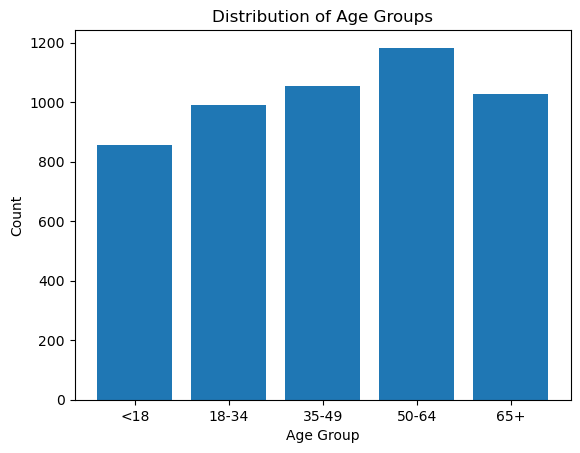

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Feature Engineering: Creating Age Groups
bins = [0, 18, 35, 50, 65, 120]  # Define age group bins


labels = ["<18", "18-34", "35-49", "50-64", "65+"]  # Labels for age groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


# Feature Engineering: Interaction Features
data['age_hypertension_interaction'] = data['age'] * data['hypertension']
data['age_heart_disease_interaction'] = data['age'] * data['heart_disease']
data['glucose_bmi_interaction'] = data['avg_glucose_level'] * data['bmi']

# Display the updated dataset
print(data.head())


# Plotting the distribution of age groups
age_group_counts = data['age_group'].value_counts().sort_index()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()


    age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
1              1            0             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                        0                  

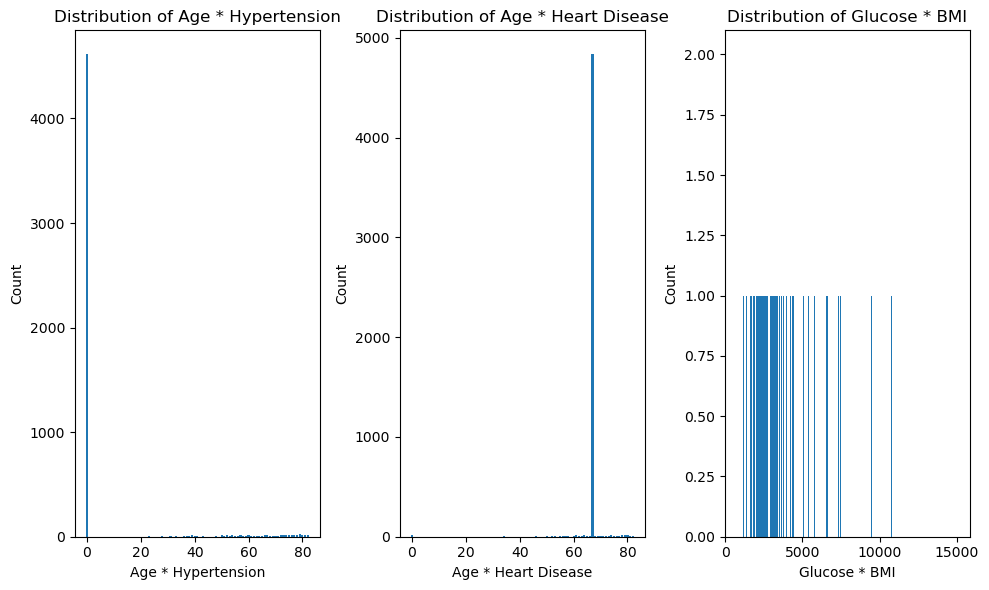

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Feature Engineering: Interaction Features
data['age_hypertension_interaction'] = data['age'] * data['hypertension']
data['age_heart_disease_interaction'] = data['age'] * data['heart_disease']
data['glucose_bmi_interaction'] = data['avg_glucose_level'] * data['bmi']

# Display the updated dataset
print(data.head())

# Plotting the distribution of interaction features
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(data['age_hypertension_interaction'].unique(), data['age_hypertension_interaction'].value_counts())
plt.xlabel('Age * Hypertension')
plt.ylabel('Count')
plt.title('Distribution of Age * Hypertension')

plt.subplot(1, 3, 2)
plt.bar(data['age_heart_disease_interaction'].unique(), data['age_heart_disease_interaction'].value_counts())
plt.xlabel('Age * Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Age * Heart Disease')

plt.subplot(1, 3, 3)
plt.bar(data['glucose_bmi_interaction'].unique(), data['glucose_bmi_interaction'].value_counts())
plt.xlabel('Glucose * BMI')
plt.ylabel('Count')
plt.title('Distribution of Glucose * BMI')

plt.tight_layout()
plt.show()

# What is the distribution of strokes within the dataset?

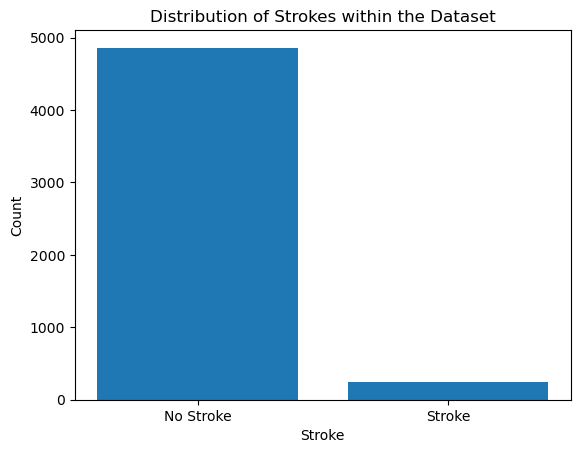

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Plotting the distribution of strokes
stroke_counts = data['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
plt.bar(labels, stroke_counts)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Strokes within the Dataset')
plt.show()


# Which attributes show the highest correlation with stroke occurrence?

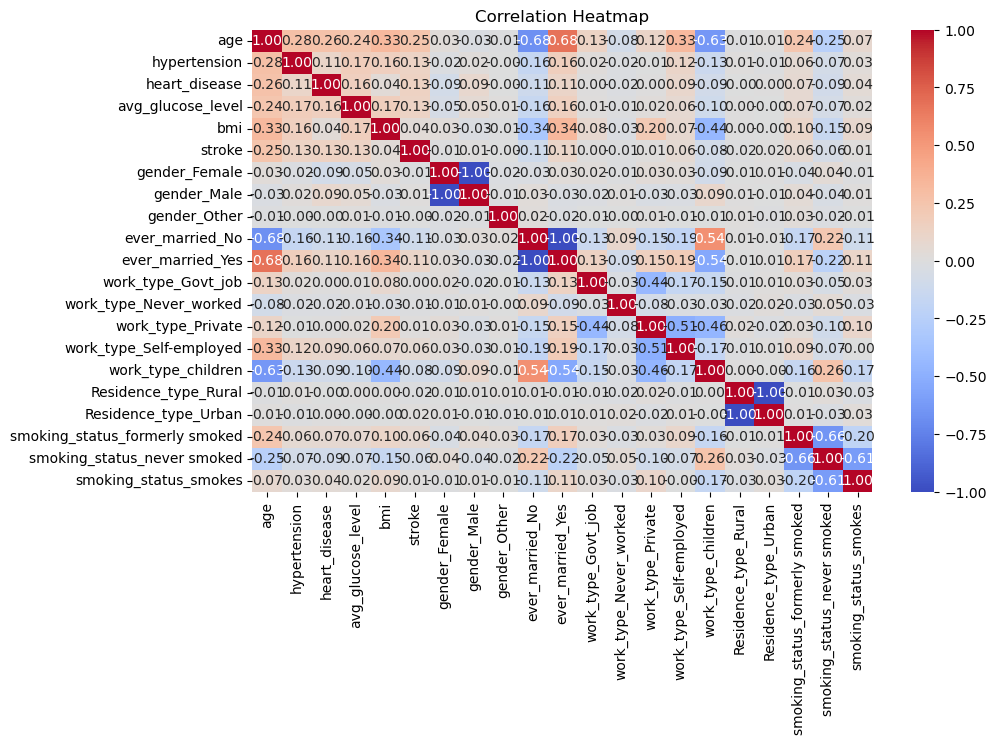

Attributes with Highest Correlation to Stroke:
 stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
gender_Other                     -0.003166
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
Residence_type_Rural             -0.015458
smoking_status_never smoked      -0.058931
work_type_children               -0.083869
ever_married_No                  -0.108340
Name: stroke, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Calculate correlations
correlation_matrix = data.corr()

# Find attributes with the highest correlation to stroke
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Print attributes with highest correlation to stroke
print("Attributes with Highest Correlation to Stroke:\n", correlation_with_stroke)


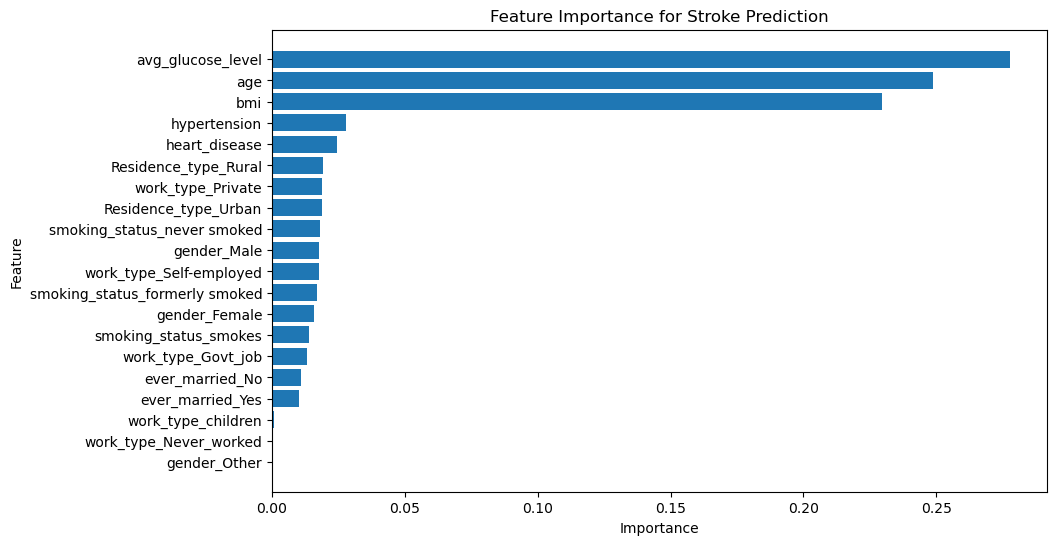

                           Feature  Importance
3                avg_glucose_level    0.277759
0                              age    0.248795
4                              bmi    0.229472
1                     hypertension    0.027866
2                    heart_disease    0.024446
15            Residence_type_Rural    0.019035
12               work_type_Private    0.018822
16            Residence_type_Urban    0.018798
18     smoking_status_never smoked    0.018206
6                      gender_Male    0.017677
13         work_type_Self-employed    0.017496
17  smoking_status_formerly smoked    0.016754
5                    gender_Female    0.015959
19           smoking_status_smokes    0.014046
10              work_type_Govt_job    0.013102
8                  ever_married_No    0.010744
9                 ever_married_Yes    0.010214
14              work_type_children    0.000795
11          work_type_Never_worked    0.000013
7                     gender_Other    0.000000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to store feature importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Stroke Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display feature importance scores
print(importance_df)

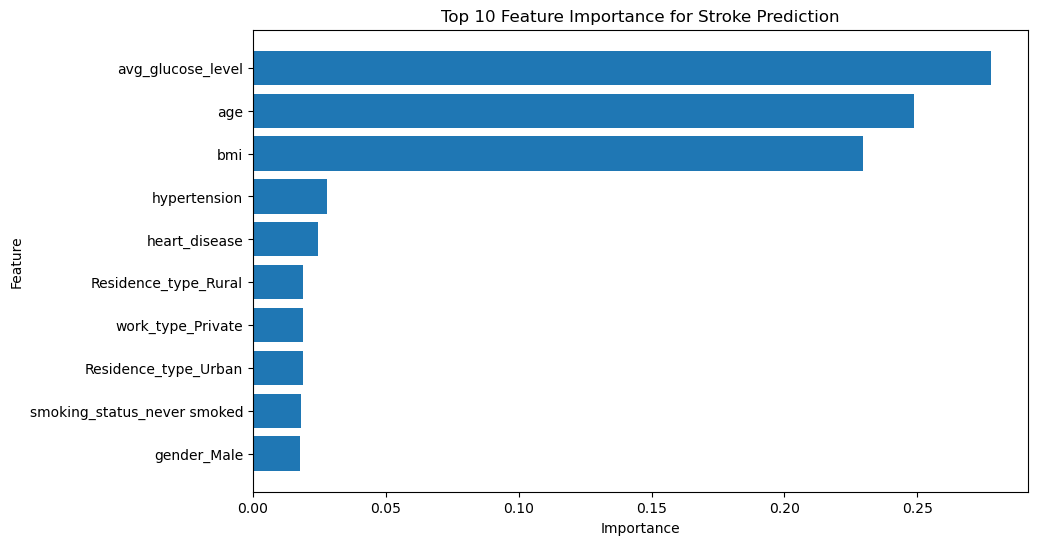

                        Feature  Importance
3             avg_glucose_level    0.277759
0                           age    0.248795
4                           bmi    0.229472
1                  hypertension    0.027866
2                 heart_disease    0.024446
15         Residence_type_Rural    0.019035
12            work_type_Private    0.018822
16         Residence_type_Urban    0.018798
18  smoking_status_never smoked    0.018206
6                   gender_Male    0.017677


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Initialize a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to store feature importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = importance_df.head(10)

# Plot the top 10 feature importance bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance for Stroke Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display top 10 feature importance scores
print(top_10_features)


# Are there any noticeable differences in average glucose levels or
### BMI between individuals who experienced strokes and those who didn't?

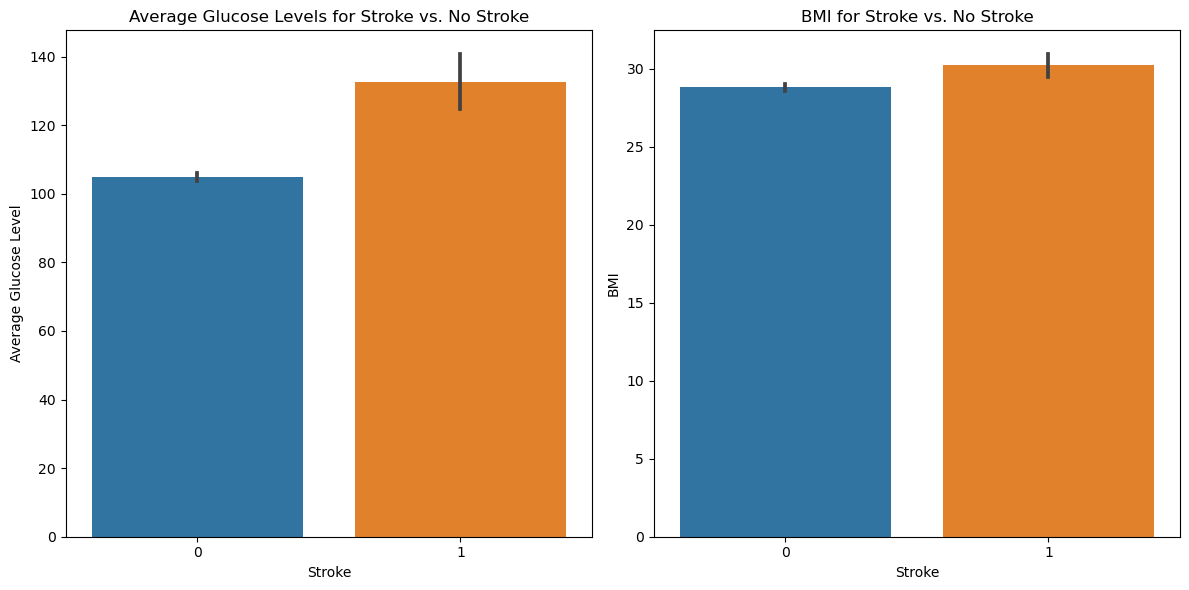

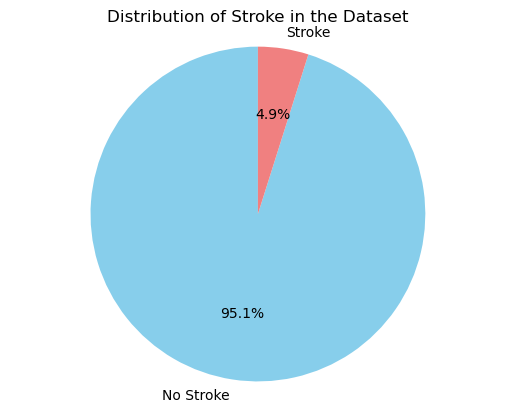

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar graph for average glucose levels
sns.barplot(x='stroke', y='avg_glucose_level', data=data, ax=axes[0])
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')
axes[0].set_title('Average Glucose Levels for Stroke vs. No Stroke')

# Bar graph for BMI
sns.barplot(x='stroke', y='bmi', data=data, ax=axes[1])
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')
axes[1].set_title('BMI for Stroke vs. No Stroke')

plt.tight_layout()
plt.show()

# Pie chart for stroke distribution
stroke_counts = data['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke in the Dataset')
plt.axis('equal')
plt.show()


# Do certain gender or age groups exhibit a higher propensity for strokes?

1. With the graph of Percentage

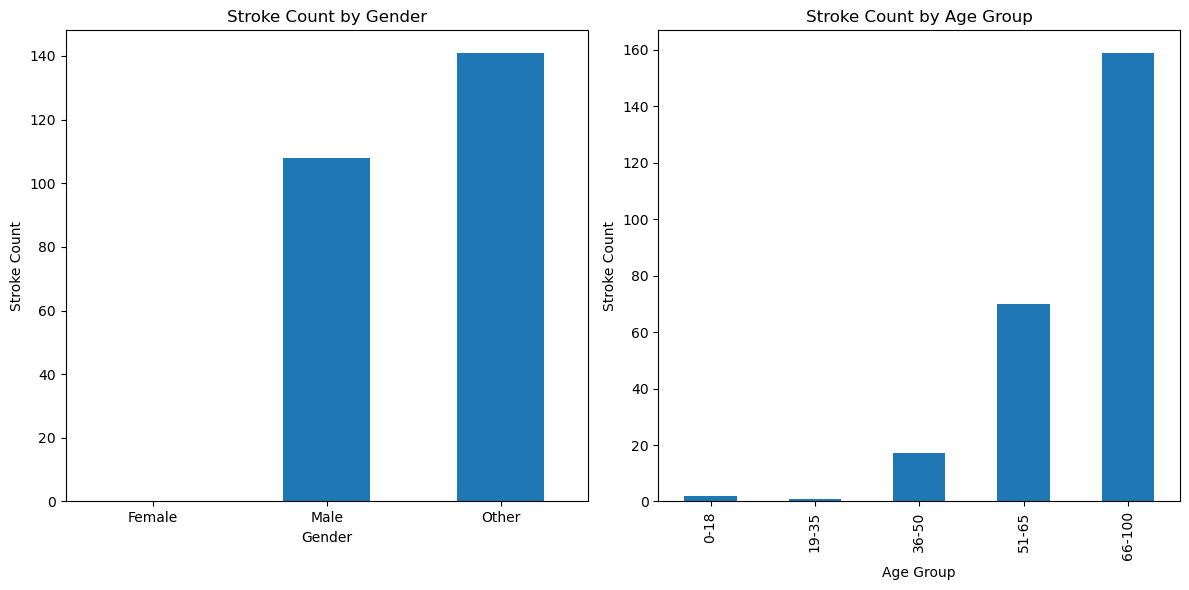

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Create age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar graph for stroke by gender
gender_stroke_counts = data.groupby(['gender_Female', 'gender_Male', 'gender_Other'])['stroke'].sum()
gender_stroke_counts.plot(kind='bar', ax=axes[0])
axes[0].set_xticklabels(['Female', 'Male', 'Other'], rotation=0)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Stroke Count')
axes[0].set_title('Stroke Count by Gender')

# Bar graph for stroke by age group
age_group_stroke_counts = data.groupby('age_group')['stroke'].sum()
age_group_stroke_counts.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Stroke Count')
axes[1].set_title('Stroke Count by Age Group')

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path

# Define age groups
def define_age_group(age):
    if age < 40:
        return 'Under 40'
    elif age < 60:
        return '40-59'
    else:
        return '60 and above'

data['age_group'] = data['age'].apply(define_age_group)

# Group the data by age group
grouped_data = data.groupby('age_group')

# Calculate stroke rates within each age group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

print(stroke_rates)

age_group
40-59            3.836317
60 and above    13.154070
Under 40         0.368664
Name: stroke, dtype: float64


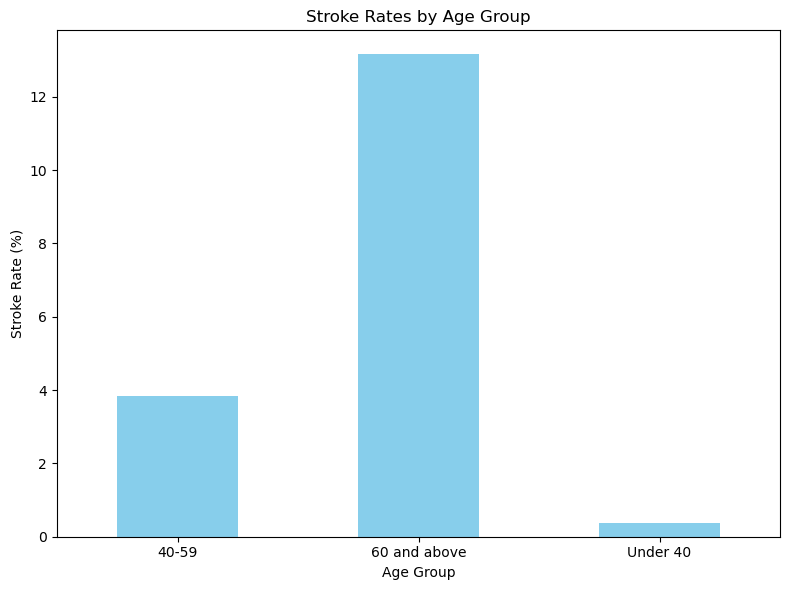

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")   # Replace with the actual file path

# Define age groups
def define_age_group(age):
    if age < 40:
        return 'Under 40'
    elif age < 60:
        return '40-59'
    else:
        return '60 and above'

data['age_group'] = data['age'].apply(define_age_group)

# Group the data by age group
grouped_data = data.groupby('age_group')

# Calculate stroke rates within each age group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

# Plot the bar graph
plt.figure(figsize=(8, 6))
stroke_rates.plot(kind='bar', color='skyblue')
plt.title('Stroke Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Are individuals with hypertension or heart disease more likely to have strokes?

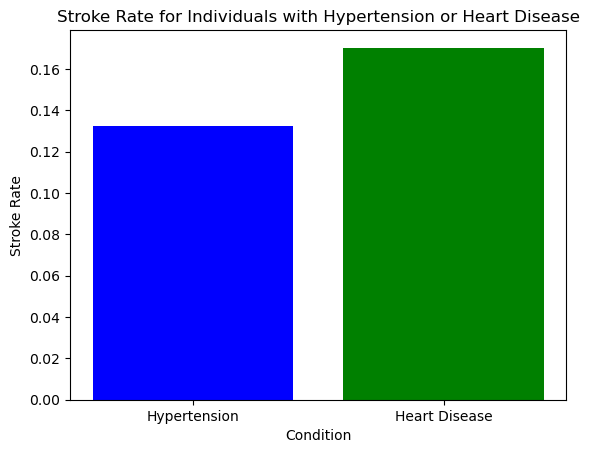

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Calculate stroke rates for individuals with hypertension and heart disease
hypertension_stroke_rate = data[data['hypertension'] == 1]['stroke'].mean()
heart_disease_stroke_rate = data[data['heart_disease'] == 1]['stroke'].mean()

# Create a bar graph
plt.bar(['Hypertension', 'Heart Disease'], [hypertension_stroke_rate, heart_disease_stroke_rate], color=['blue', 'green'])
plt.xlabel('Condition')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate for Individuals with Hypertension or Heart Disease')
plt.show()


##  Does smoking status have a significant impact on stroke occurrence?

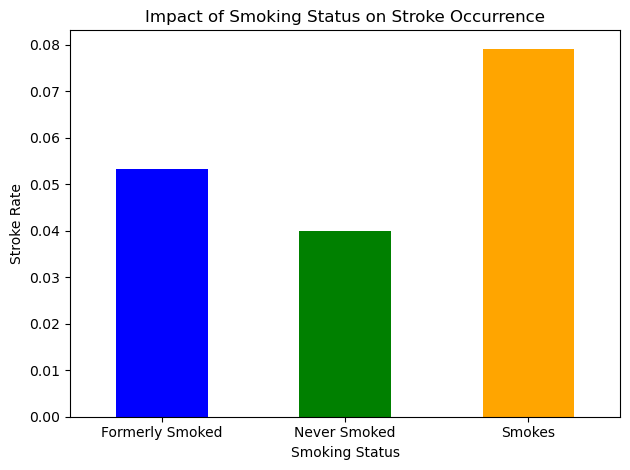

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Calculate stroke rates for different smoking statuses
smoking_status_stroke_rate = data.groupby(['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'])['stroke'].mean()

# Create a bar graph with labels and different colors
colors = ['blue', 'green', 'orange']
labels = ['Formerly Smoked', 'Never Smoked', 'Smokes']

ax = smoking_status_stroke_rate.plot(kind='bar', color=colors)
ax.set_xticklabels(labels, rotation=0)
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Rate')
plt.title('Impact of Smoking Status on Stroke Occurrence')
plt.tight_layout()
plt.show()

## Impotance of Features for Stroke Prediction?

1. Top Features of Importance

2. Correlation Matrix

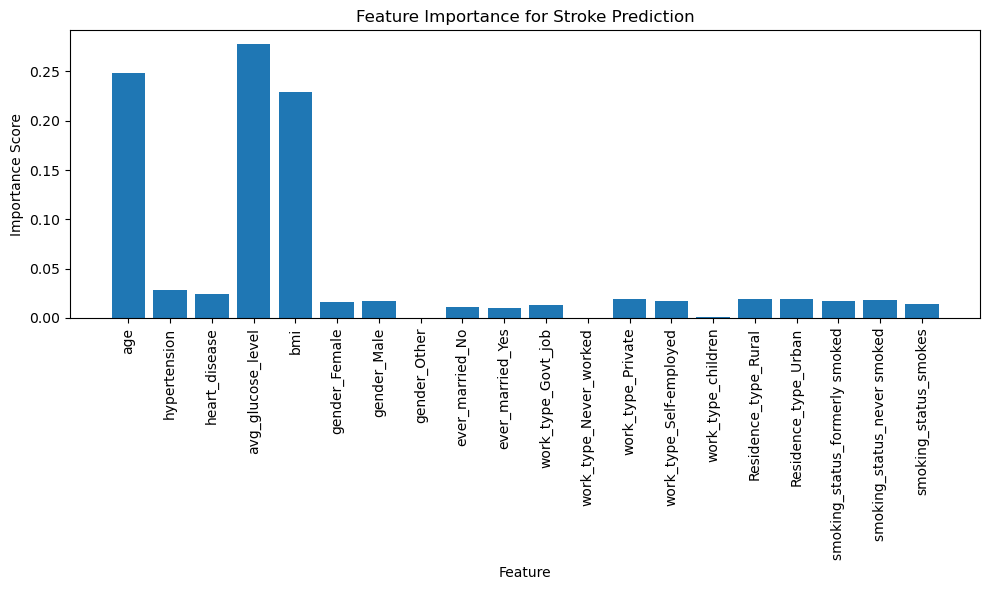

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Prepare features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a bar graph to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Stroke Prediction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Attributes with the highest positive correlation with 'stroke':
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married_Yes     0.108340
Name: stroke, dtype: float64

Attributes with the highest negative correlation with 'stroke':
ever_married_No   -0.10834
Name: stroke, dtype: float64


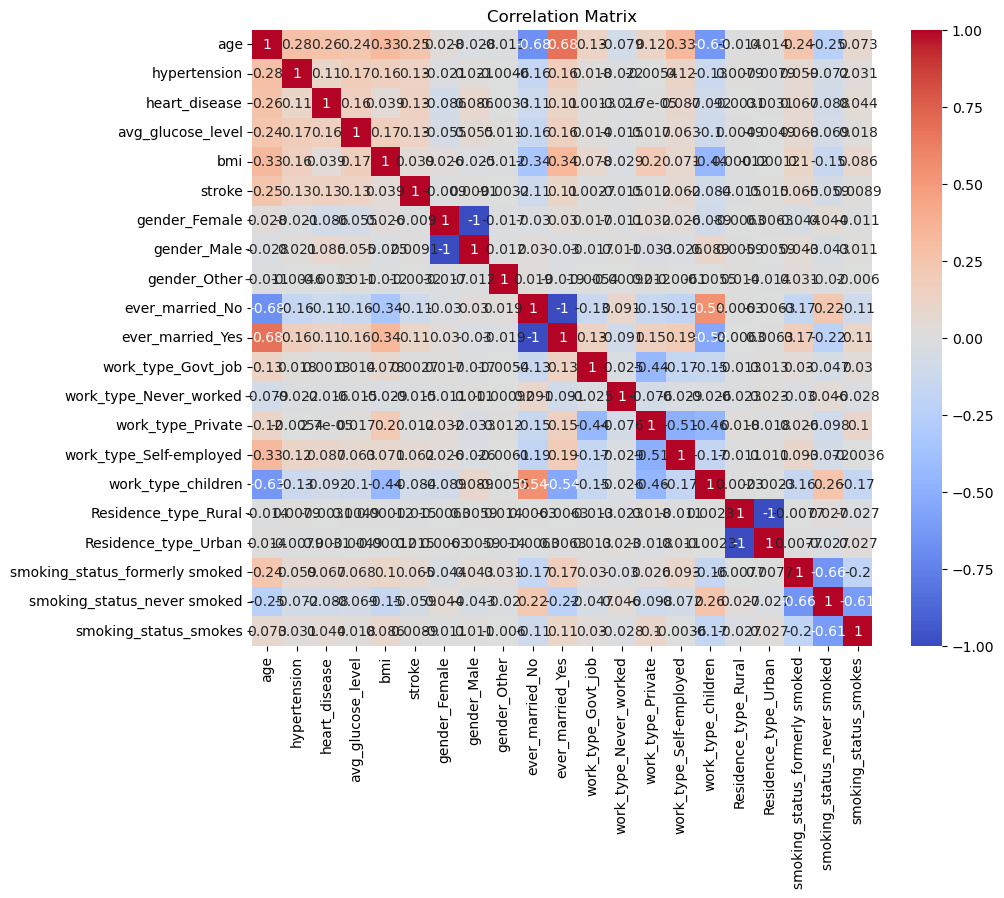

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Identify attributes with the highest positive or negative correlation with 'stroke'
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)

# Print the attributes with the highest correlation
print("Attributes with the highest positive correlation with 'stroke':")
print(correlation_with_stroke[correlation_with_stroke > 0.1])
print("\nAttributes with the highest negative correlation with 'stroke':")
print(correlation_with_stroke[correlation_with_stroke < -0.1])

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## How does marital status or work type correlate with the likelihood of stroke?

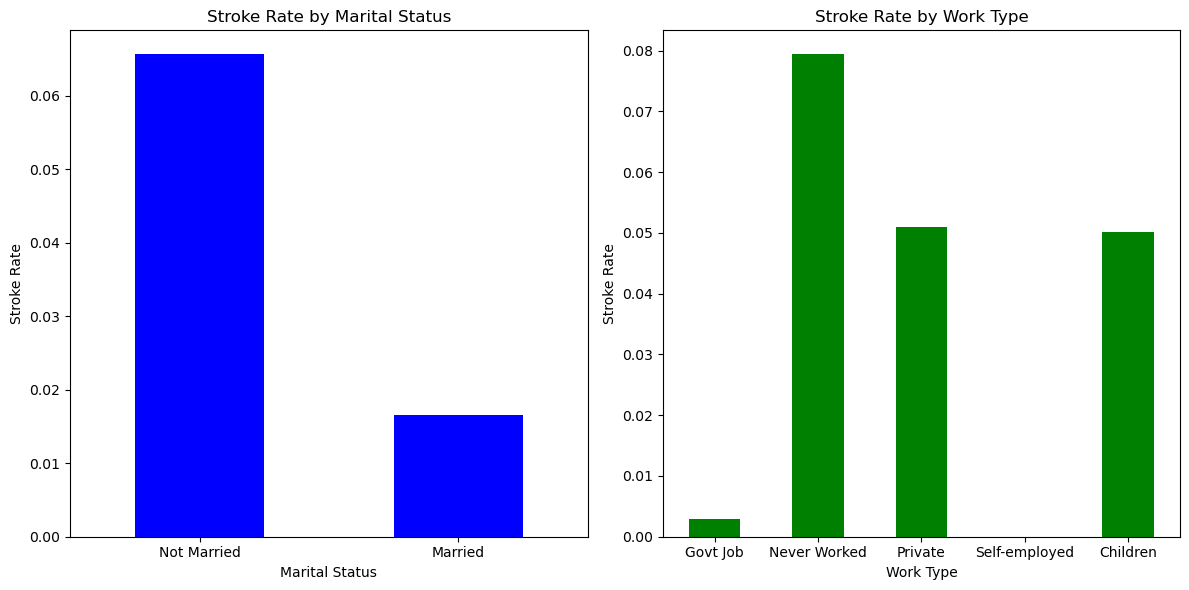

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Calculate stroke rates for different marital status and work type categories
marital_status_stroke_rate = data.groupby(['ever_married_No', 'ever_married_Yes'])['stroke'].mean()
work_type_stroke_rate = data.groupby(['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'])['stroke'].mean()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar graph for stroke by marital status
marital_status_stroke_rate.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_xticklabels(['Not Married', 'Married'], rotation=0)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Stroke Rate')
axes[0].set_title('Stroke Rate by Marital Status')

# Bar graph for stroke by work type
work_type_stroke_rate.plot(kind='bar', color='green', ax=axes[1])
work_type_labels = ['Govt Job', 'Never Worked', 'Private', 'Self-employed', 'Children']
axes[1].set_xticklabels(work_type_labels, rotation=0)
axes[1].set_xlabel('Work Type')
axes[1].set_ylabel('Stroke Rate')
axes[1].set_title('Stroke Rate by Work Type')

plt.tight_layout()
plt.show()


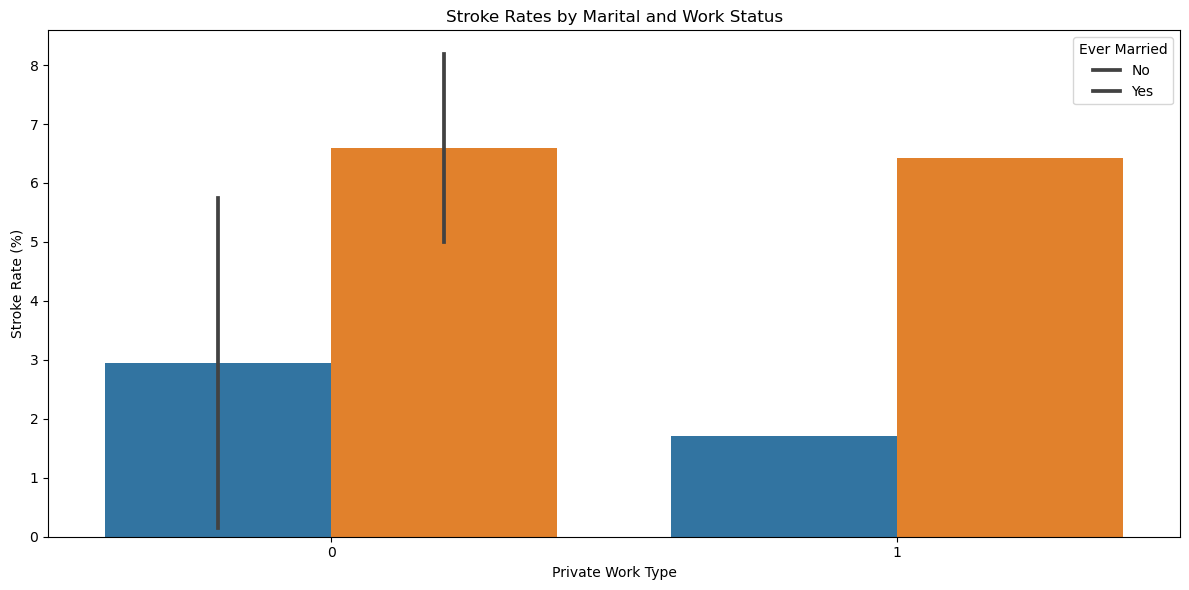

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path

# Group the data by marital status and work type
grouped_data = data.groupby(['ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
                             'work_type_Private', 'work_type_Self-employed', 'work_type_children'])

# Calculate stroke rates within each group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

# Reset the index for plotting
stroke_rates = stroke_rates.reset_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='work_type_Private', y='stroke', hue='ever_married_Yes', data=stroke_rates)
plt.title('Stroke Rates by Marital and Work Status')
plt.xlabel('Private Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Ever Married', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


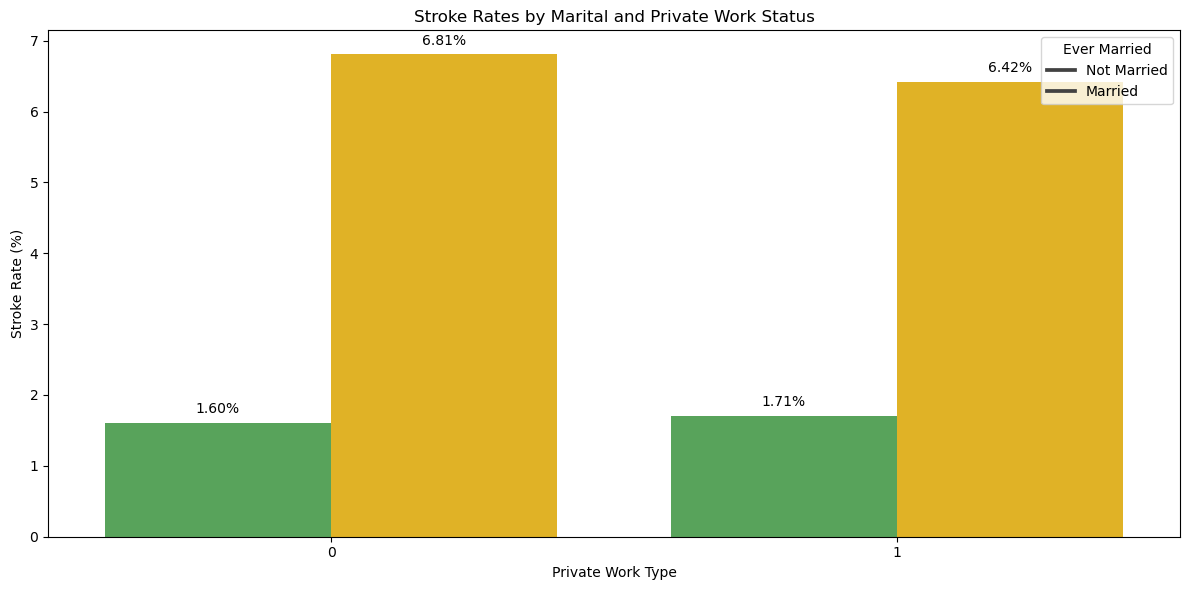

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path

# Group the data by marital status and work type
grouped_data = data.groupby(['ever_married_No', 'ever_married_Yes', 'work_type_Private'])

# Calculate stroke rates within each group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

# Reset the index for plotting
stroke_rates = stroke_rates.reset_index()

# Create a custom color palette
custom_palette = sns.color_palette(["#4CAF50", "#FFC107"])

# Create the bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='work_type_Private', y='stroke', hue='ever_married_Yes', data=stroke_rates, palette=custom_palette)
plt.title('Stroke Rates by Marital and Private Work Status')
plt.xlabel('Private Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Ever Married', loc='upper right', labels=['Not Married', 'Married'])

# Labeling for interpretation
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

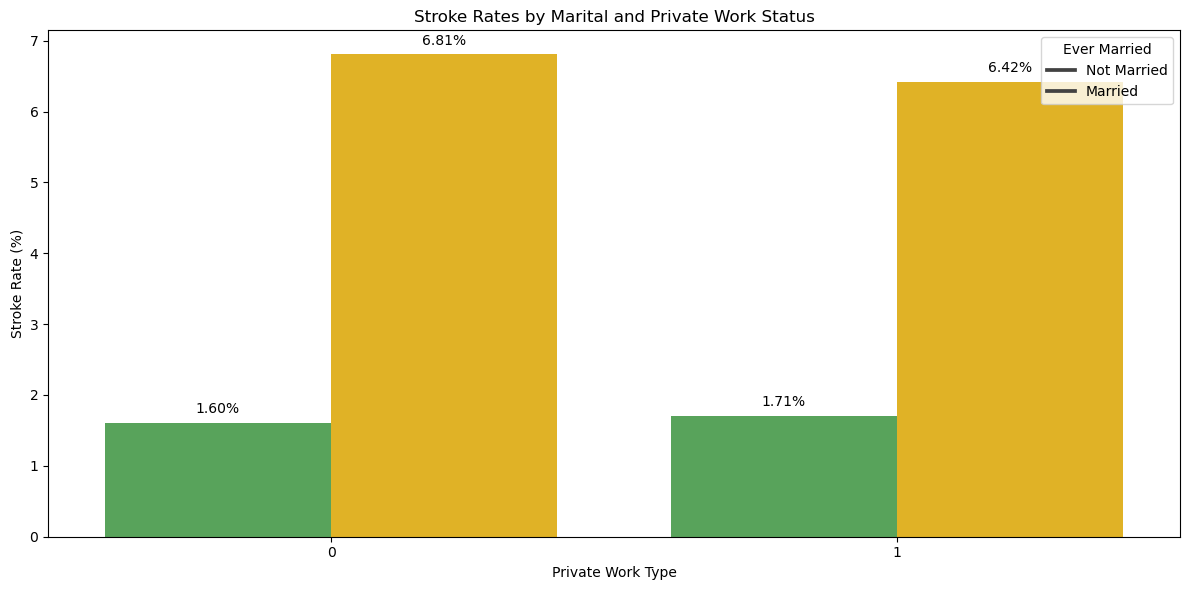

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path

# Group the data by marital status and work type
grouped_data = data.groupby(['ever_married_No', 'ever_married_Yes', 'work_type_Private'])

# Calculate stroke rates within each group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

# Reset the index for plotting
stroke_rates = stroke_rates.reset_index()

# Create a custom color palette
custom_palette = sns.color_palette(["#4CAF50", "#FFC107"])

# Create the bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='work_type_Private', y='stroke', hue='ever_married_Yes', data=stroke_rates, palette=custom_palette)
plt.title('Stroke Rates by Marital and Private Work Status')
plt.xlabel('Private Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Ever Married', loc='upper right', labels=['Not Married', 'Married'])

# Labeling for interpretation
for p in ax.patches:
    height = p.get_height()
    if p.get_x() == 1.0:  # For 'ever_married_Yes' bars
        ax.annotate('Ever Married', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                    textcoords='offset points')
    else:
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


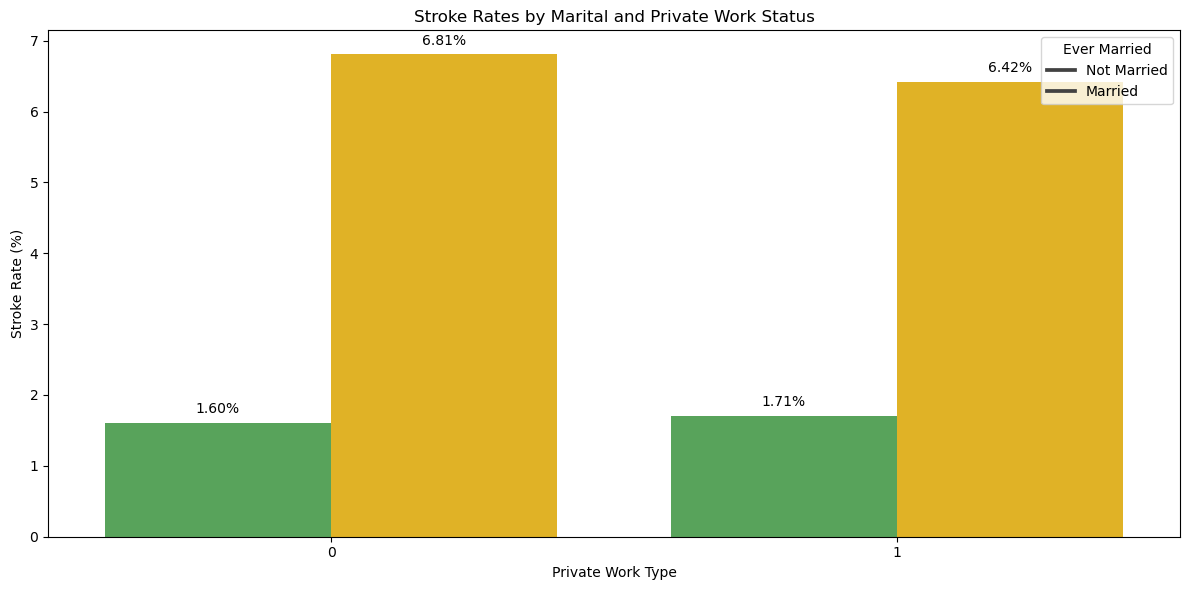

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv") # Replace with the actual file path

# Group the data by marital status and work type
grouped_data = data.groupby(['ever_married_No', 'ever_married_Yes', 'work_type_Private'])

# Calculate stroke rates within each group
stroke_rates = grouped_data['stroke'].mean() * 100  # Multiply by 100 to get percentage

# Reset the index for plotting
stroke_rates = stroke_rates.reset_index()

# Create a custom color palette
custom_palette = sns.color_palette(["#4CAF50", "#FFC107"])

# Create the grouped bar graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='work_type_Private', y='stroke', hue='ever_married_Yes', data=stroke_rates, palette=custom_palette)
plt.title('Stroke Rates by Marital and Private Work Status')
plt.xlabel('Private Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Ever Married', loc='upper right', labels=['Not Married', 'Married'])

# Labeling for interpretation
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## Are there interactions between attributes that amplify stroke risk?

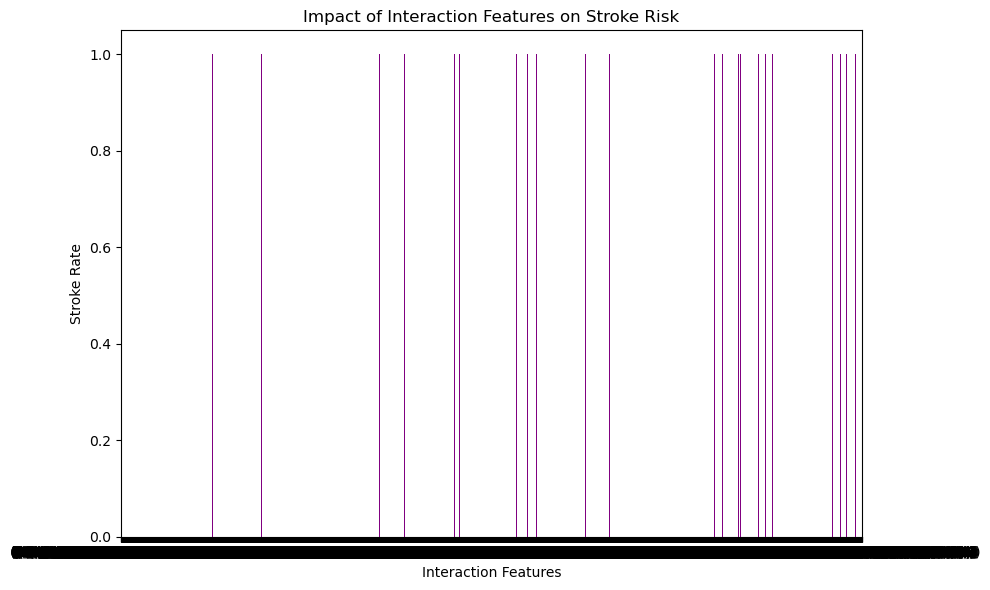

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Define interaction features
data['age_hypertension_interaction'] = data['age'] * data['hypertension']
data['age_heart_disease_interaction'] = data['age'] * data['heart_disease']
data['glucose_bmi_interaction'] = data['avg_glucose_level'] * data['bmi']

# Calculate stroke rates for different interaction features
interaction_cols = ['age_hypertension_interaction', 'age_heart_disease_interaction', 'glucose_bmi_interaction']
interaction_stroke_rate = data.groupby(interaction_cols)['stroke'].mean()

# Create a bar graph to visualize the impact of interaction features on stroke risk
interaction_stroke_rate.plot(kind='bar', color='purple', figsize=(10, 6))
plt.xlabel('Interaction Features')
plt.ylabel('Stroke Rate')
plt.title('Impact of Interaction Features on Stroke Risk')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Can we identify individuals with low risk of stroke despite certain risk factors?

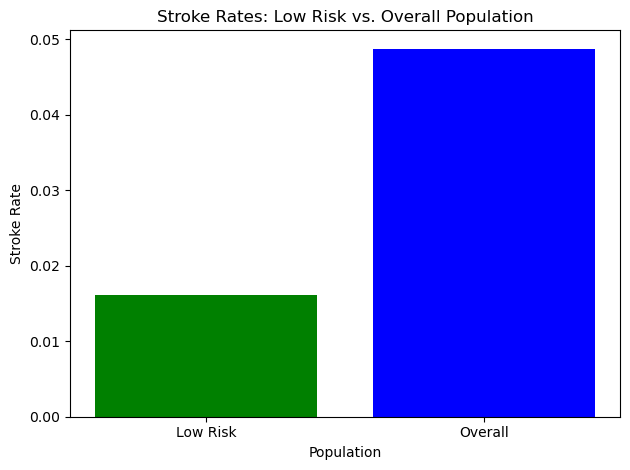

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Define risk factors (columns that you consider as risk factors)
risk_factor_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Define threshold values for risk factors (below which individuals are considered to have low risk)
thresholds = {'hypertension': 0, 'heart_disease': 0, 'avg_glucose_level': 120, 'bmi': 25}

# Filter individuals with low risk based on threshold values
low_risk_individuals = data[(data[risk_factor_cols] <= pd.Series(thresholds)).all(axis=1)]

# Calculate and compare stroke rates for low-risk and overall populations
stroke_rate_low_risk = low_risk_individuals['stroke'].mean()
stroke_rate_overall = data['stroke'].mean()

# Create a bar graph to visualize stroke rates for low-risk and overall populations
plt.bar(['Low Risk', 'Overall'], [stroke_rate_low_risk, stroke_rate_overall], color=['green', 'blue'])
plt.xlabel('Population')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rates: Low Risk vs. Overall Population')
plt.tight_layout()
plt.show()

## Making 5 Years Prediction Using Random Forest Classifier

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Separate features and target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on scaled data
clf.fit(X_scaled, y_resampled)

# Make predictions for new data points
new_data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path for new data
X_new = new_data.drop(columns=['stroke'])
y_new = new_data['stroke']

X_new_scaled = scaler.transform(X_new)  # Scale the new data using the same scaler

predicted_stroke_cases = clf.predict(X_new_scaled)

# Evaluate the accuracy of predictions
accuracy = accuracy_score(y_new, predicted_stroke_cases)
print(f"Accuracy of predictions for new data: {accuracy:.2f}")


Accuracy of predictions for new data: 1.00


Accuracy of predictions for new data: 1.00


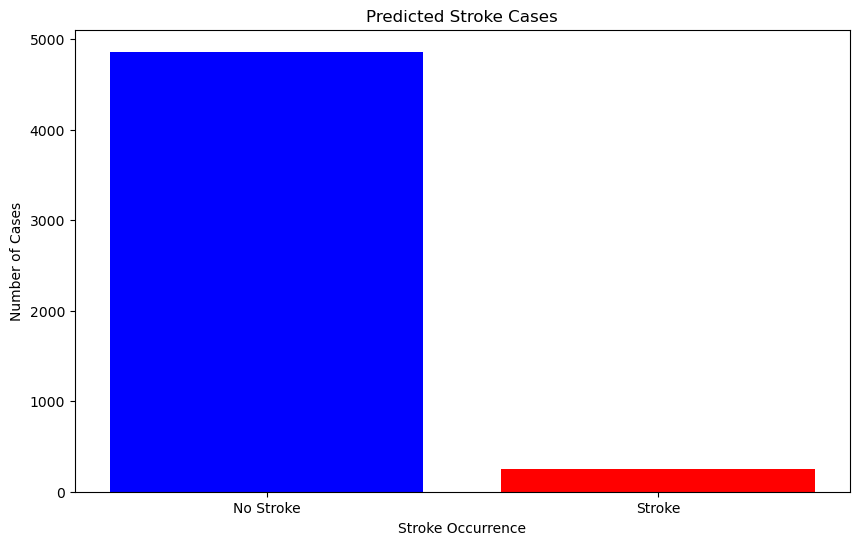

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")

# Separate features and target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on scaled data
clf.fit(X_scaled, y_resampled)

# Make predictions for new data points
new_data = pd.read_csv("Ashcroft's Feature Engineering process.csv")  # Replace with the actual file path for new data
X_new = new_data.drop(columns=['stroke'])
y_new = new_data['stroke']

X_new_scaled = scaler.transform(X_new)  # Scale the new data using the same scaler

predicted_stroke_cases = clf.predict(X_new_scaled)

# Evaluate the accuracy of predictions
accuracy = accuracy_score(y_new, predicted_stroke_cases)
print(f"Accuracy of predictions for new data: {accuracy:.2f}")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.bar(["No Stroke", "Stroke"], [len(y_new) - sum(y_new), sum(y_new)], color=['blue', 'red'])
plt.xlabel("Stroke Occurrence")
plt.ylabel("Number of Cases")
plt.title("Predicted Stroke Cases")
plt.show()


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess your data (replace with your actual data loading and preprocessing code)
data = pd.read_csv("Ashcroft's Feature Engineering process.csv")
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Simulate predictions for the next 5 years
years_to_predict = 5
predictions = []

for year in range(years_to_predict):
    # Generate hypothetical data for the next year
    new_data = pd.DataFrame({
        'age': np.random.randint(40, 80, size=100),
        'hypertension': np.random.choice([0, 1], size=100),
        'heart_disease': np.random.choice([0, 1], size=100),
        'avg_glucose_level': np.random.uniform(70, 300, size=100),
        'bmi': np.random.uniform(15, 50, size=100),
        'gender_Female': np.random.choice([0, 1], size=100),
        'gender_Male': np.random.choice([0, 1], size=100),
        'ever_married_No': np.random.choice([0, 1], size=100),
        'ever_married_Yes': np.random.choice([0, 1], size=100),
        'work_type_Govt_job': np.random.choice([0, 1], size=100),
        'work_type_Never_worked': np.random.choice([0, 1], size=100),
        'work_type_Private': np.random.choice([0, 1], size=100),
        'work_type_Self-employed': np.random.choice([0, 1], size=100),
        'work_type_children': np.random.choice([0, 1], size=100),
        'Residence_type_Rural': np.random.choice([0, 1], size=100),
        'Residence_type_Urban': np.random.choice([0, 1], size=100),
        'smoking_status_formerly smoked': np.random.choice([0, 1], size=100),
        'smoking_status_never smoked': np.random.choice([0, 1], size=100),
        'smoking_status_smokes': np.random.choice([0, 1], size=100),
        'gender_Other': np.random.choice([0, 1], size=100)  # Add this feature
    })

    # Make predictions for the new year's data
    new_predictions = clf.predict(new_data)
    predictions.extend(new_predictions)


# Calculate the percentage of predicted stroke cases for each year
percentage_predictions = np.mean(predictions) * 100

print(f"Predicted percentage of stroke cases for the next {years_to_predict} years: {percentage_predictions:.2f}%")


Predicted percentage of stroke cases for the next 5 years: 0.00%
